In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('C:/Users/Administrator/Scikit_learn/HOUSEPRICE/train.csv',delimiter=',',header=0)
test=pd.read_csv('C:/Users/Administrator/Scikit_learn/HOUSEPRICE/test.csv',delimiter=',',header=0)
#用/
dff=pd.concat([train,test],axis=0)
df=train
df_backup=df

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#原分类变量为空值且为单独属性加上空属性作为新属性
df.Alley.fillna('No_access',inplace=True)
#fillna不改变原数据,inplace=True改变源数据
df.PoolQC.fillna('No_pool',inplace=True)
df.MiscFeature.fillna('None',inplace=True)
df.Fence.fillna('No_fence',inplace=True)
df.FireplaceQu.fillna('No_fireplace',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [7]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [8]:
df_corr=df.corr()

In [9]:
print(df_corr.sort_values(by='SalePrice'))

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
PoolArea       0.057044  

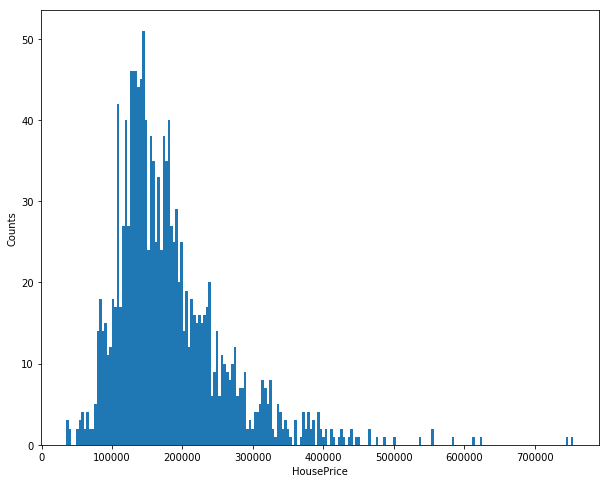

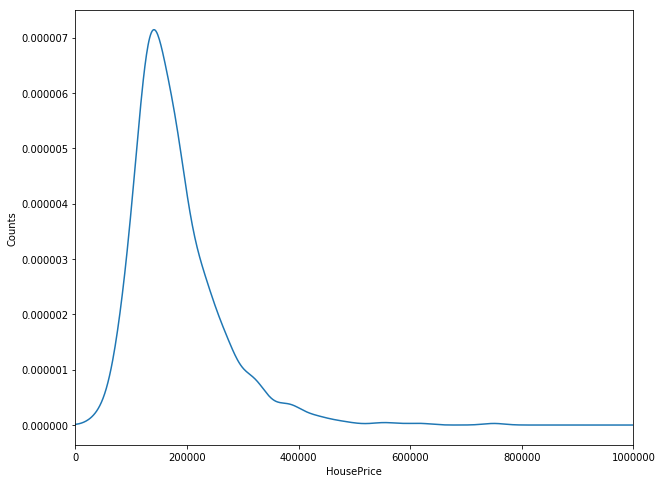

In [10]:
plt.figure(figsize=(10,8)) 
plt.hist(df['SalePrice'],bins=200)
plt.xlabel('HousePrice')
plt.ylabel('Counts')
plt.show()

plt.figure(figsize=(10,8)) 
df['SalePrice'].plot(kind='kde')
#plot是pylab的函数，kind(line,bar,kde,barh)
plt.xlabel('HousePrice')
plt.ylabel('Counts')
plt.xlim([0,1000000])
plt.show()

[20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45, 180, 40]


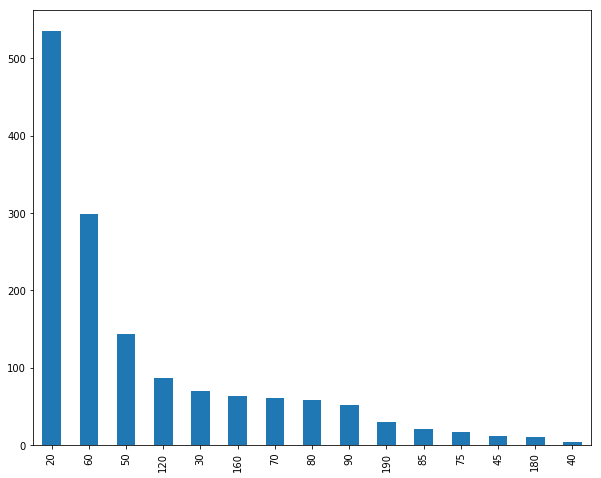

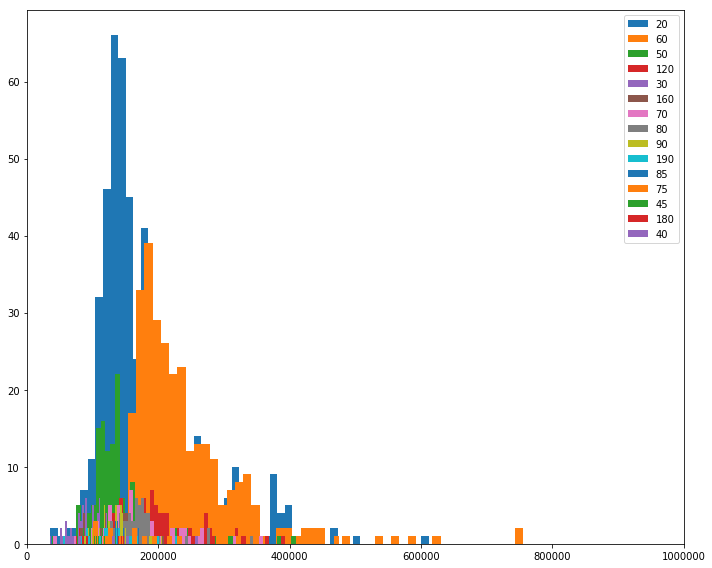

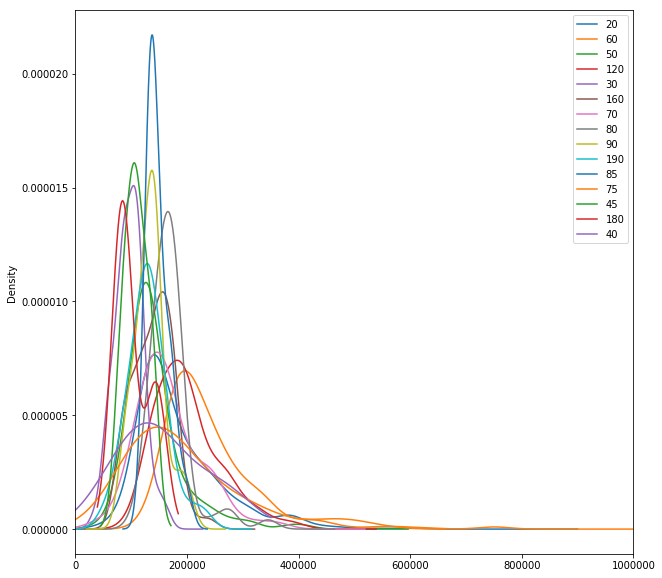

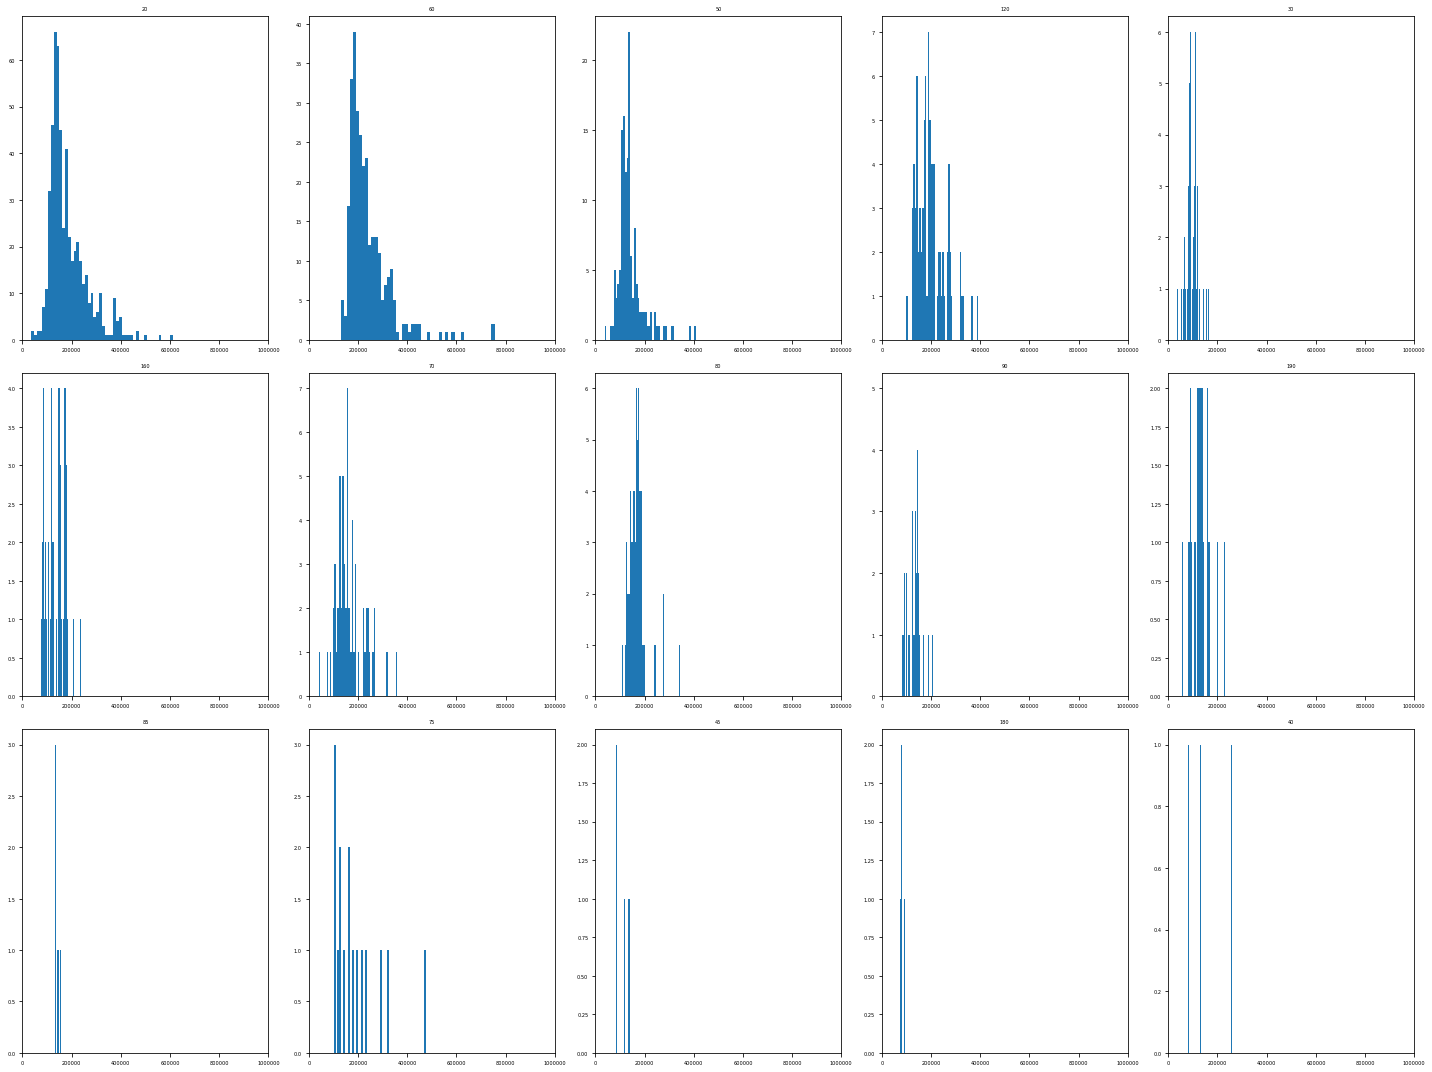

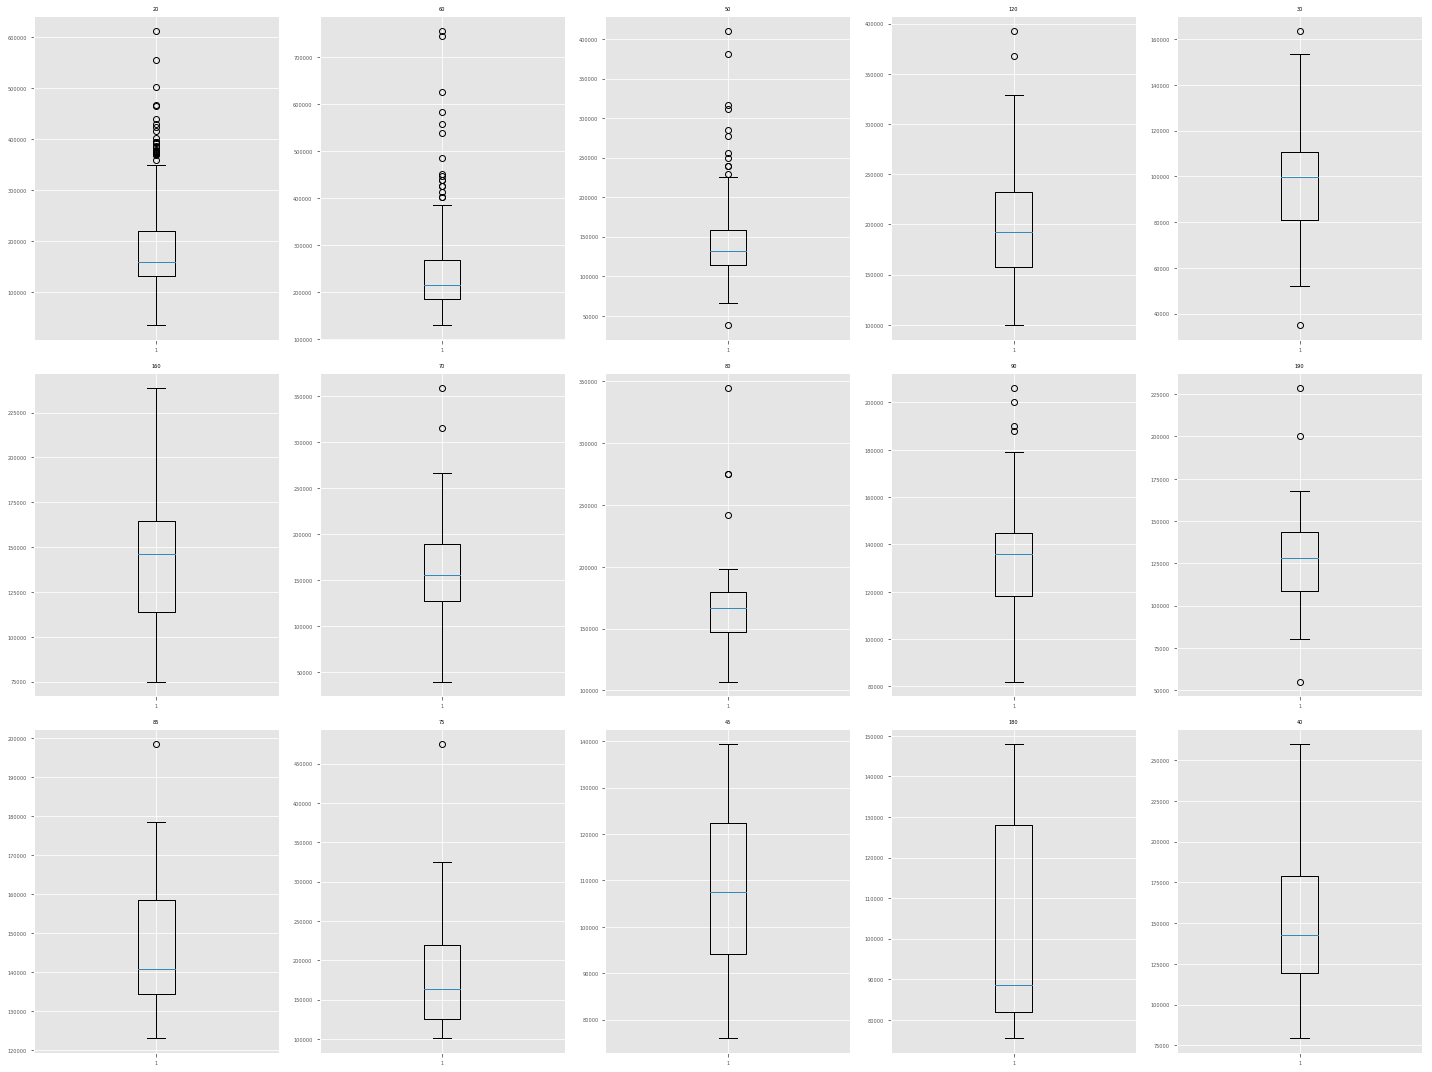

In [11]:
df.SalePrice.value_counts()
df.MSSubClass.value_counts().plot(kind='bar',figsize=(10,8))
sta_MSSubClass=df.MSSubClass.value_counts().index
sta_MSSubClass=list(sta_MSSubClass.values)
print(sta_MSSubClass)
plt.show()



type(sta_MSSubClass)
#获取变量类型
plt.figure(figsize=(10,8)) 
for i in sta_MSSubClass:
    plt.hist(df.SalePrice[df.MSSubClass==i],bins=50)  
   
plt.xlim([0,1000000])
plt.legend(['20','60','50','120','30','160','70','80','90','190','85','75','45','180','40'])
plt.tight_layout()
plt.show()
for i in sta_MSSubClass:
    df.SalePrice[df.MSSubClass==i].plot(kind='kde',figsize=(10,10))
plt.xlim([0,1000000])
plt.legend(['20','60','50','120','30','160','70','80','90','190','85','75','45','180','40'])
plt.show()

plt.figure(figsize=(20,15)) 
for i in sta_MSSubClass:
    plt.subplot(3,5,sta_MSSubClass.index(i)+1)
    plt.hist(df.SalePrice[df.MSSubClass==i],bins=50)  
    plt.title(i,fontsize=5)
    plt.xlim([0,1000000])
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)

#plt.legend(['20','60','50','120','30','160','70','80','90','190','85','75','45','180','40'])
plt.tight_layout()
plt.savefig('YES.png',dpi=1000)
plt.style.use('ggplot')
plt.show()

#subplot 可以用（3,5,i）的方式
#在 plt.show() 之前调用 plt.savefig()
#plt.tight_layout()设置子图间距

plt.figure(figsize=(20,15)) 
for i in sta_MSSubClass:
    plt.subplot(3,5,sta_MSSubClass.index(i)+1)
    plt.boxplot(x=df.SalePrice[df.MSSubClass==i])

    plt.title(i,fontsize=5)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)

plt.tight_layout()
plt.style.use('ggplot')
plt.show()
#先设置大小

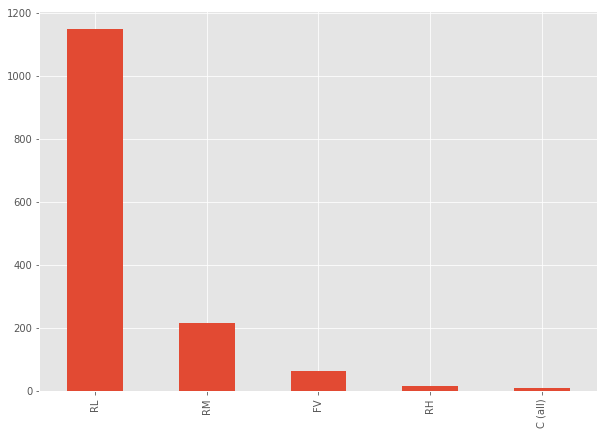

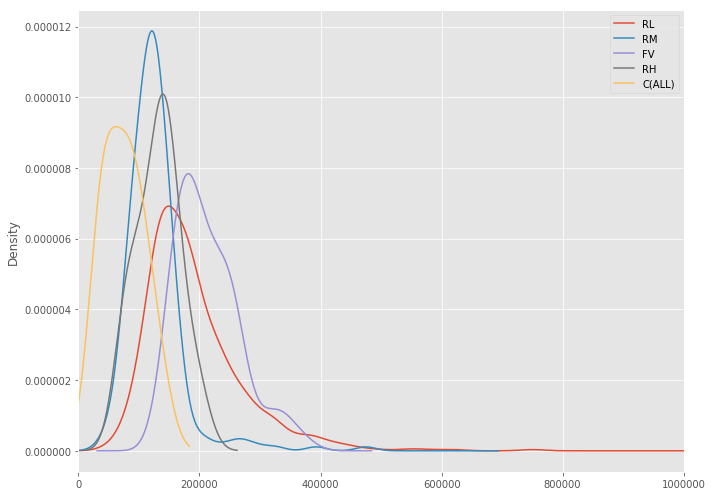

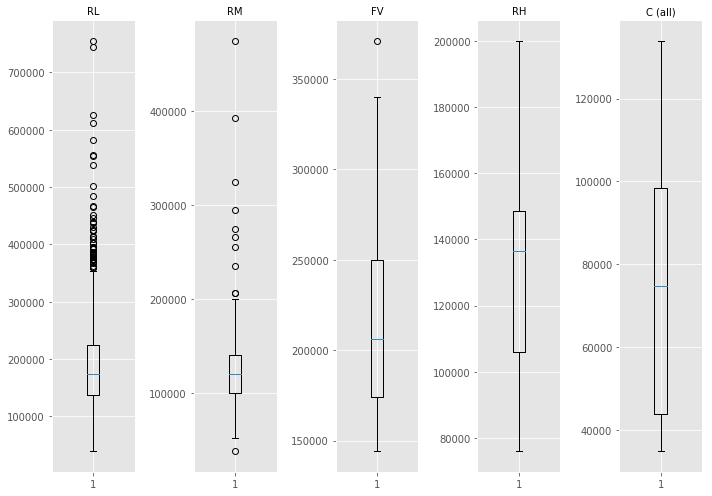

In [12]:
df.MSZoning.value_counts().plot(kind='bar',figsize=(10,7))
plt.show()
#plt.figure(figsize=(20,15)) 
sta_MSZoning=df.MSZoning.value_counts().index
type(sta_MSZoning)
sta_MSZoning=list(sta_MSZoning.values)
for i in sta_MSZoning:
    df.SalePrice[df.MSZoning==i].plot(kind='kde',figsize=(10,7))
plt.xlim([0,1000000])
plt.legend(['RL','RM','FV','RH','C(ALL)'])
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,7)) 
for i in sta_MSZoning:
    plt.subplot(1,5,sta_MSZoning.index(i)+1)
    plt.boxplot(x=df.SalePrice[df.MSZoning==i])
    plt.title(i,fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.style.use('ggplot')
plt.show()

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object
Index(['Id', 'MSSubClass', 'LotFront

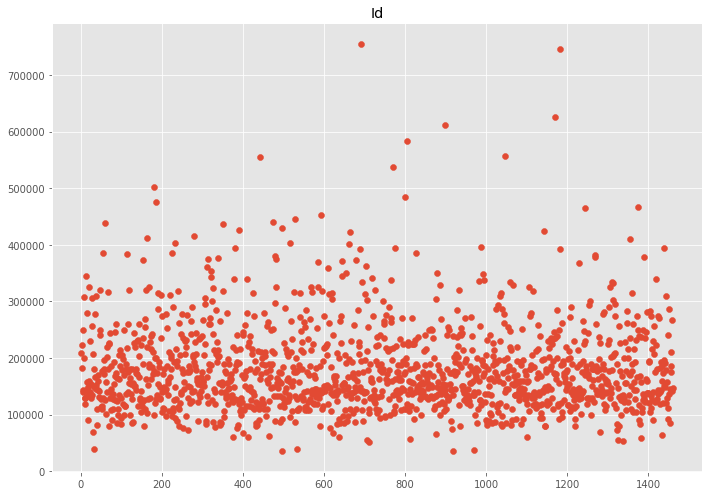

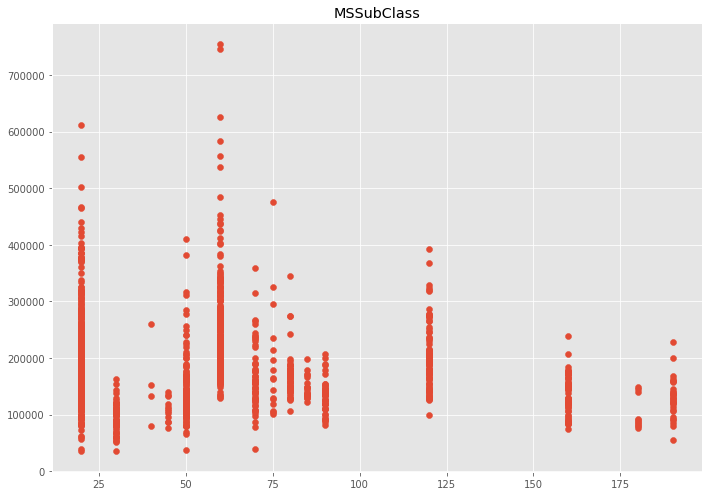

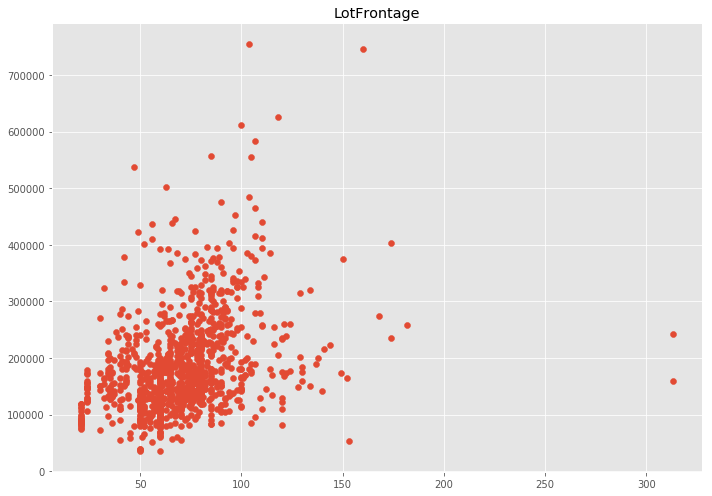

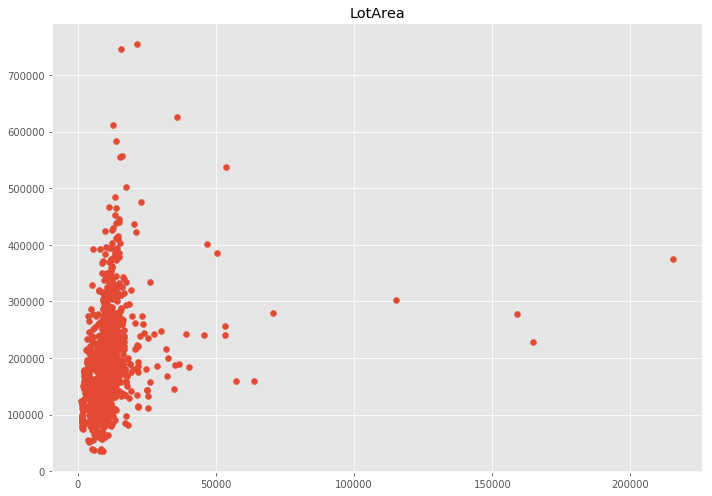

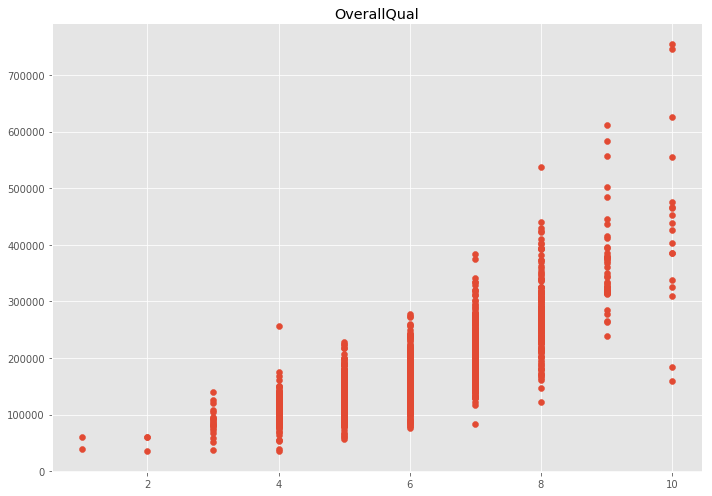

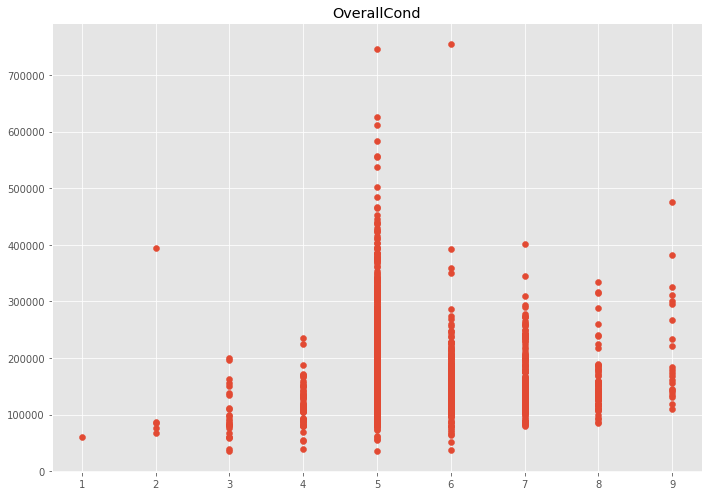

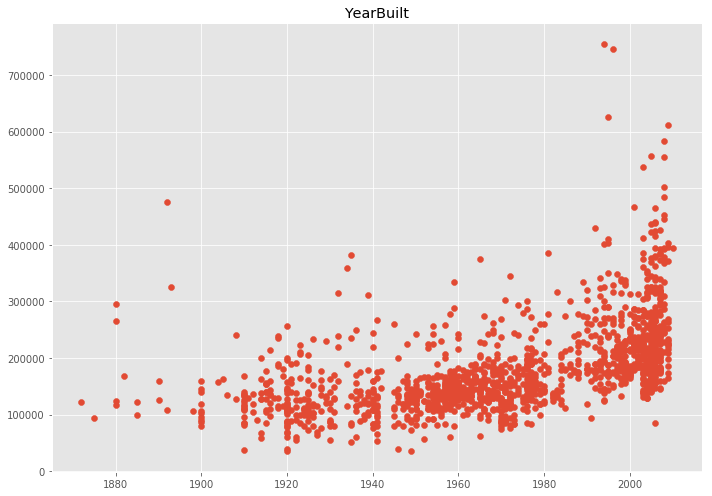

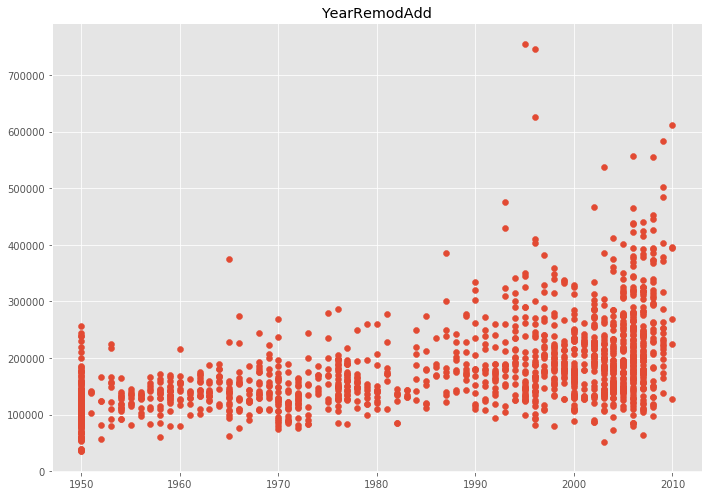

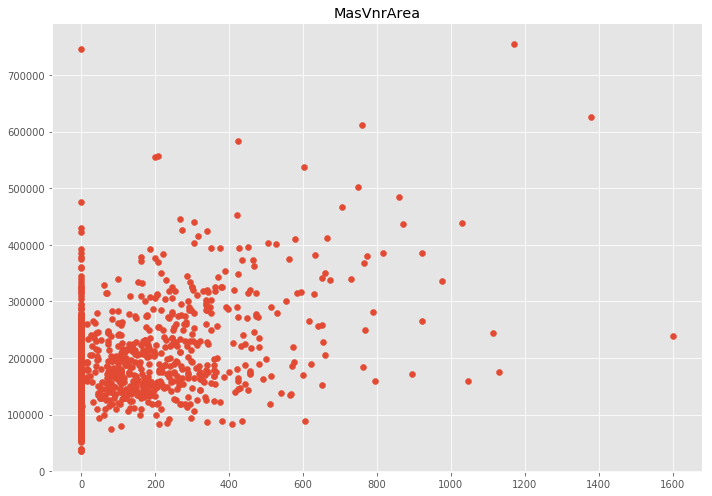

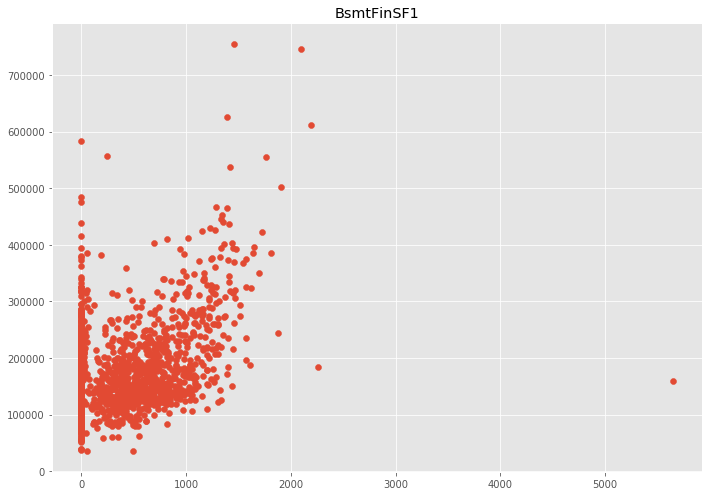

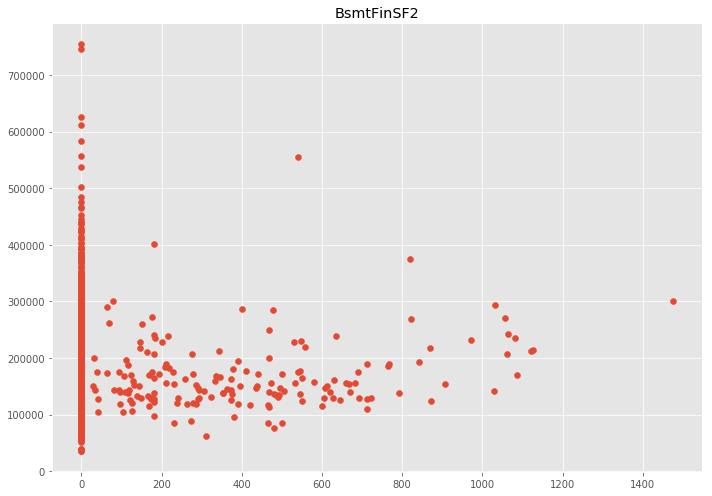

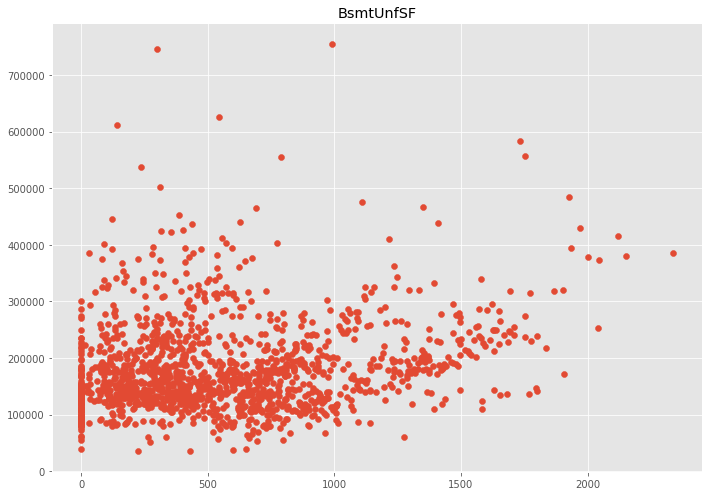

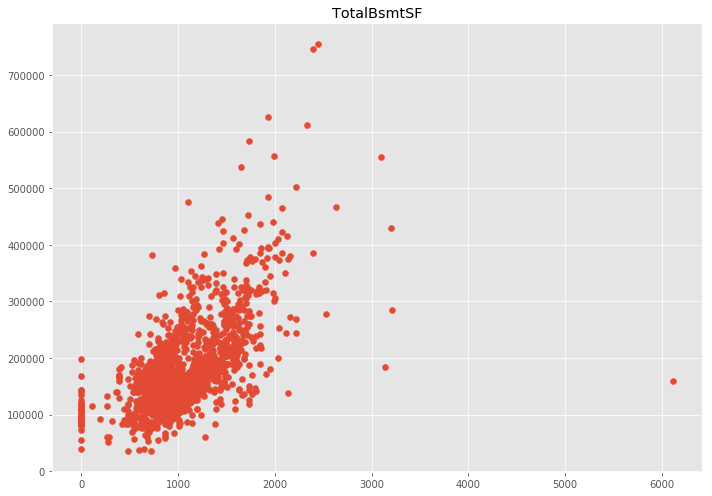

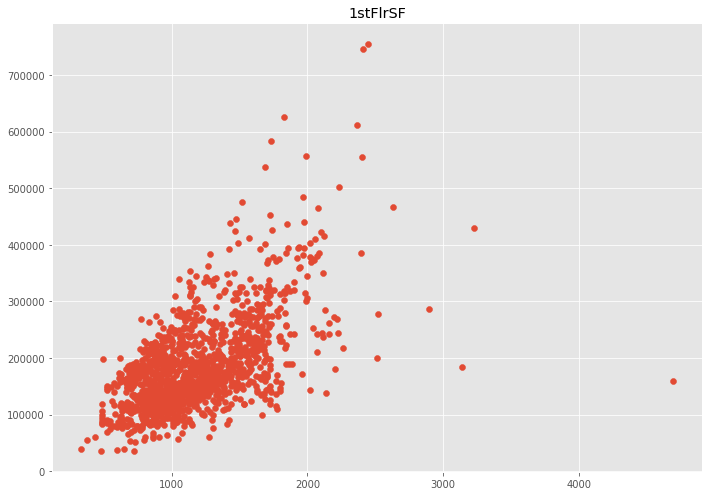

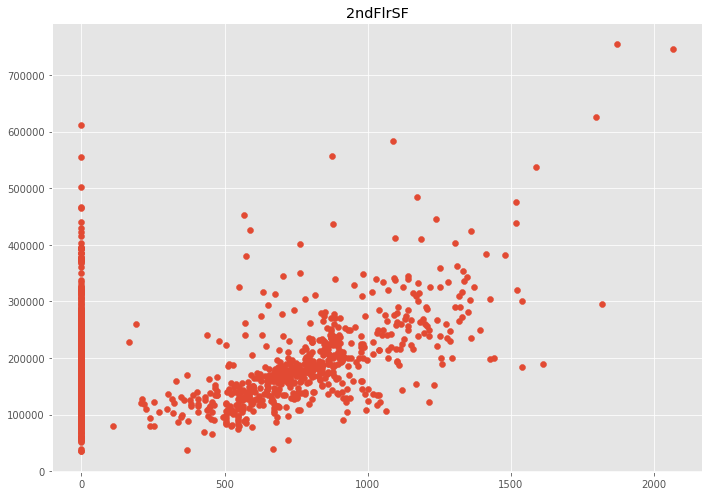

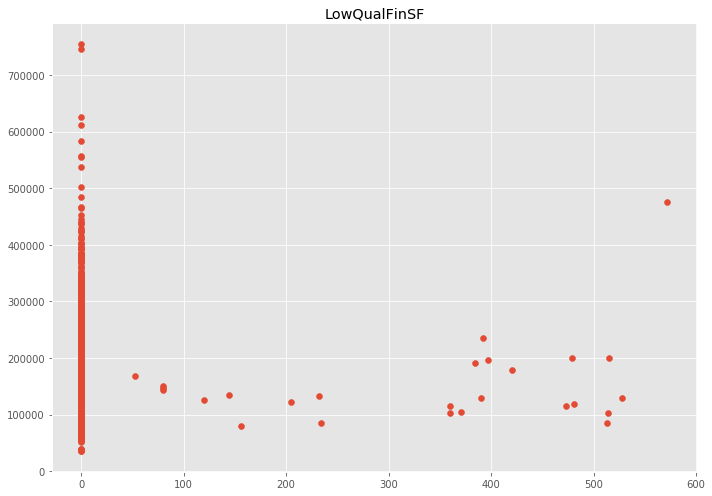

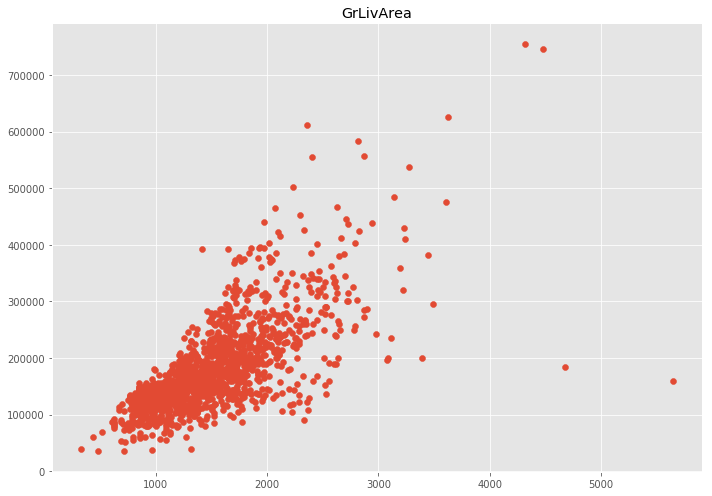

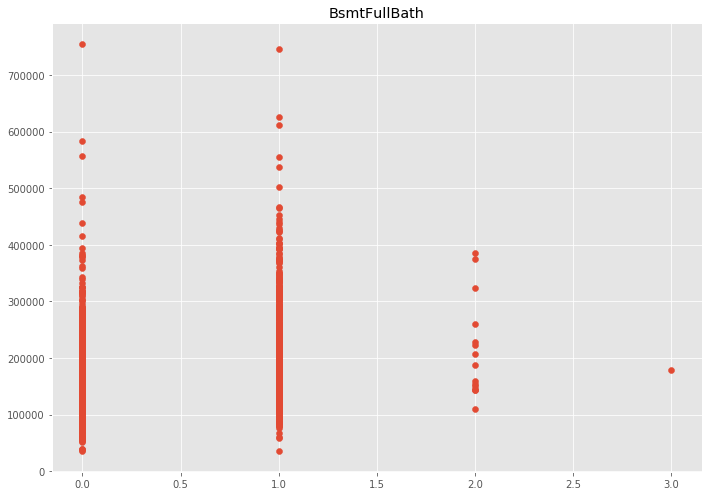

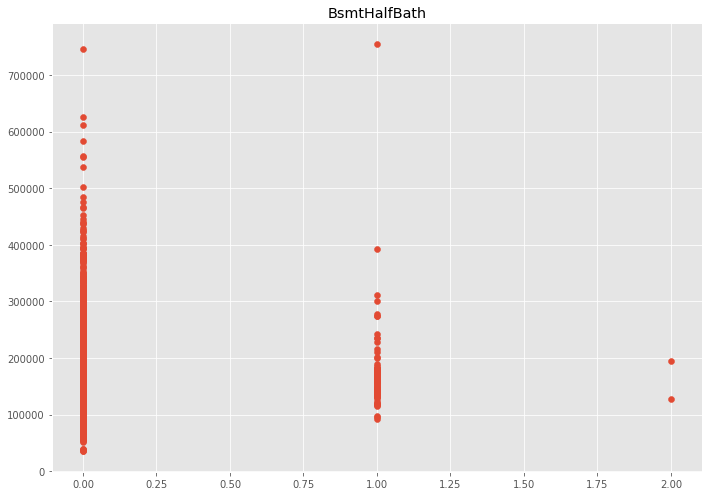

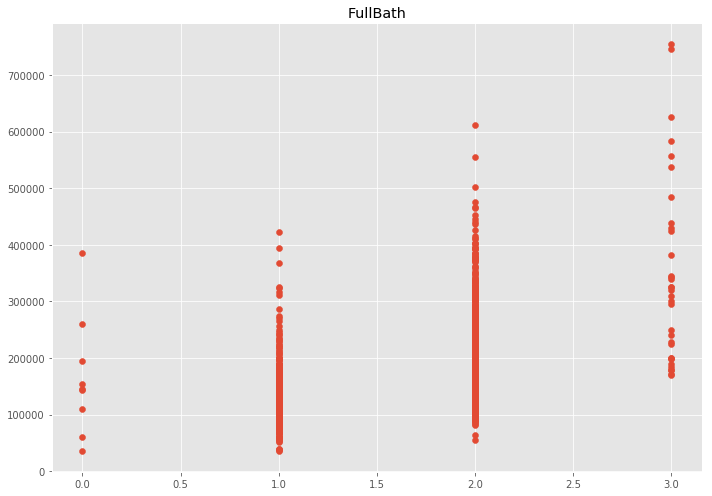

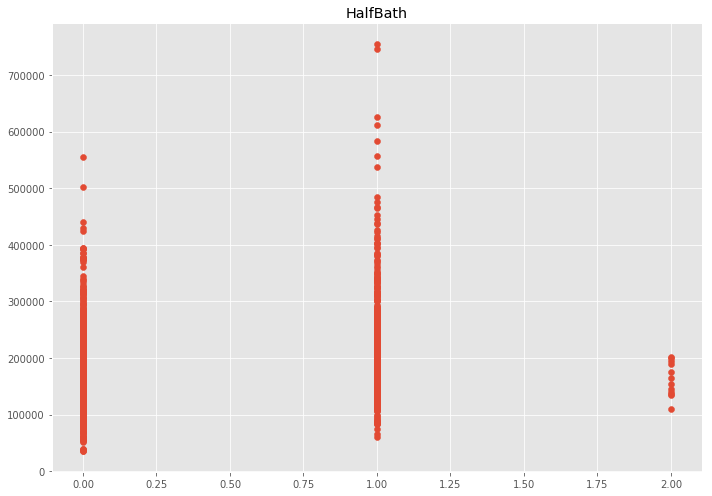

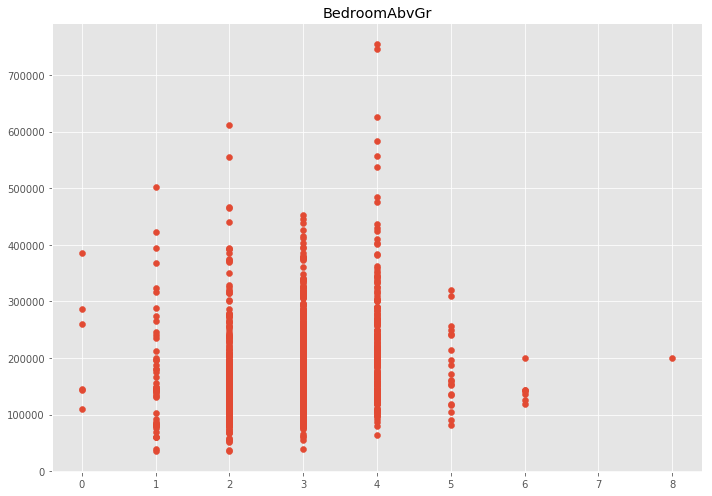

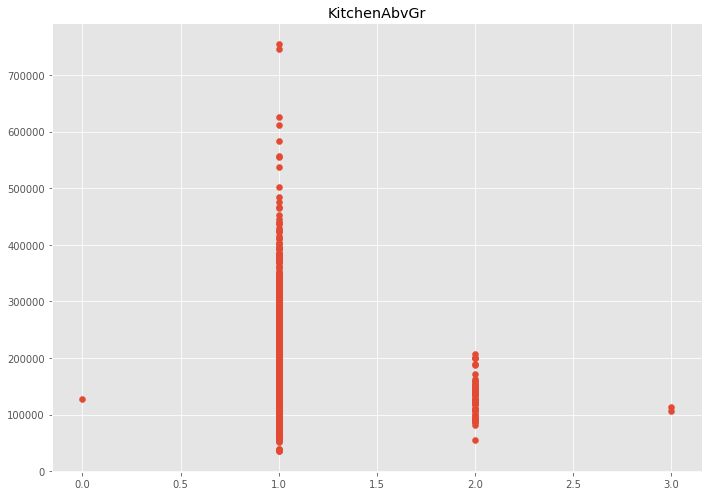

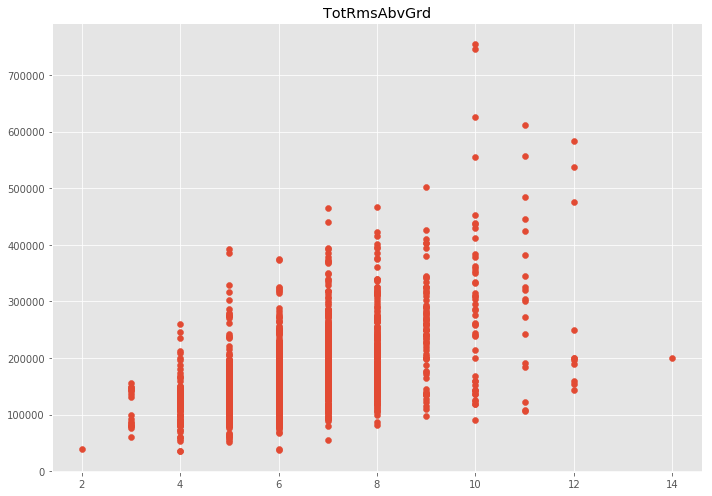

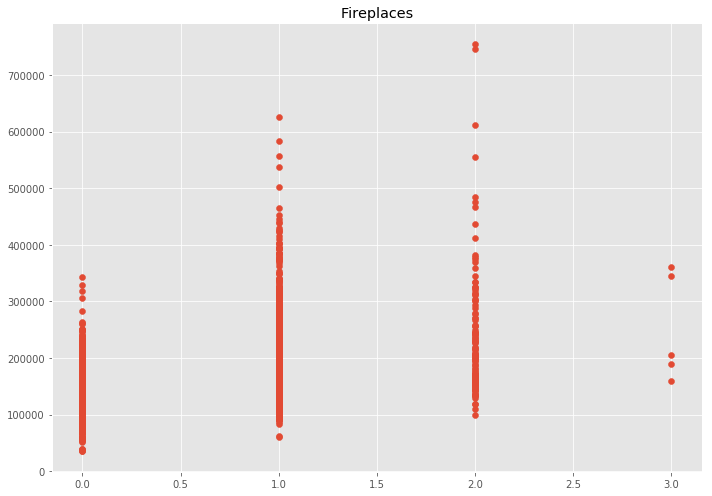

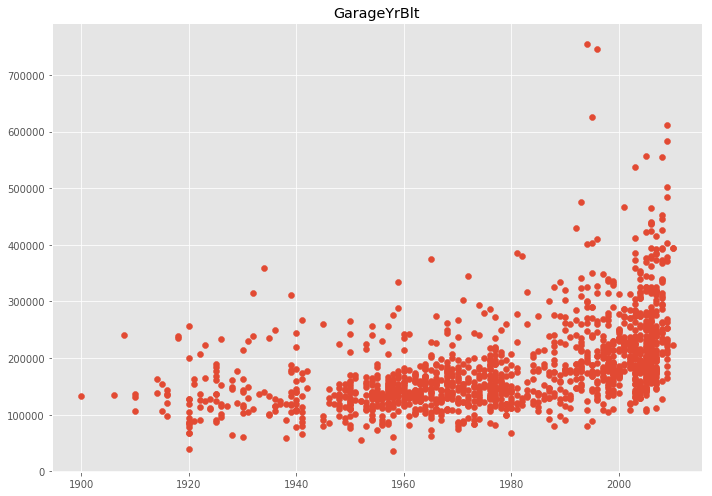

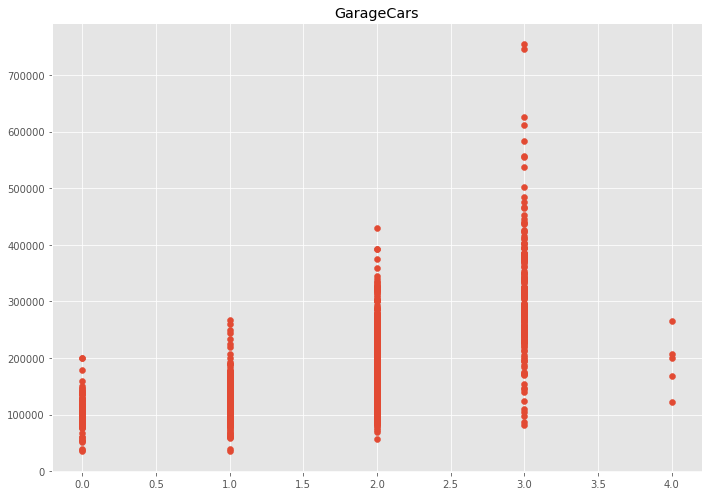

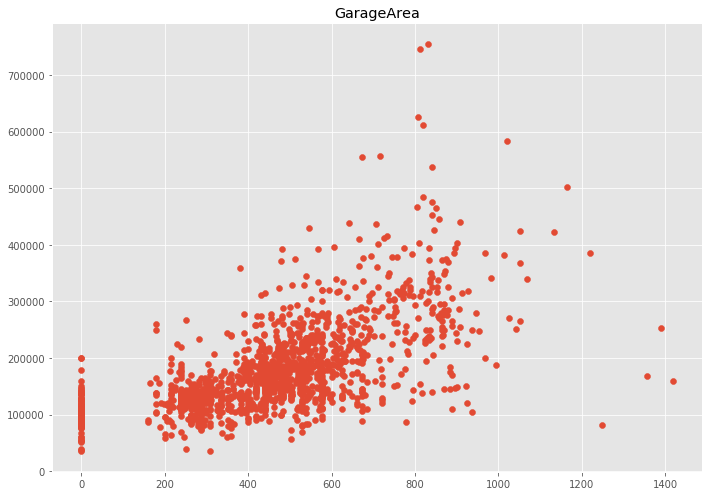

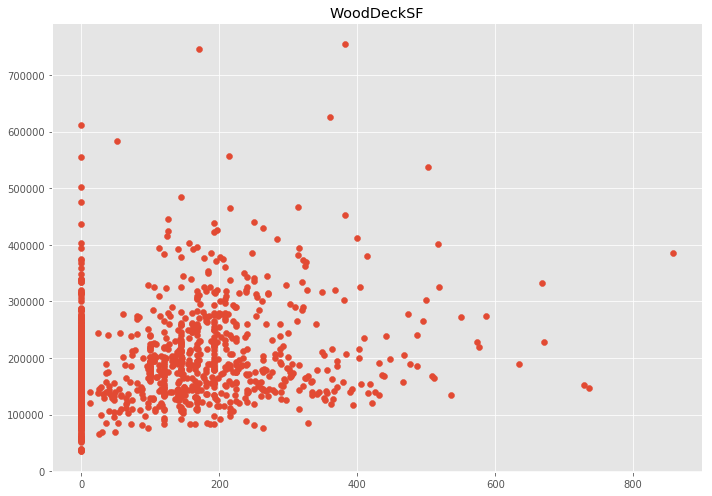

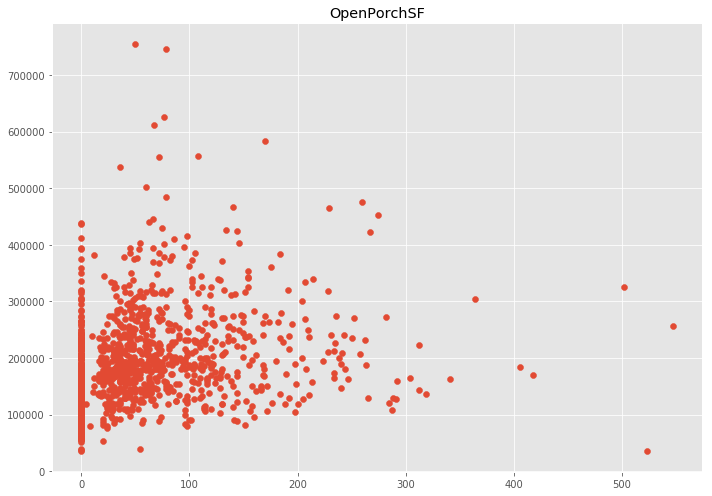

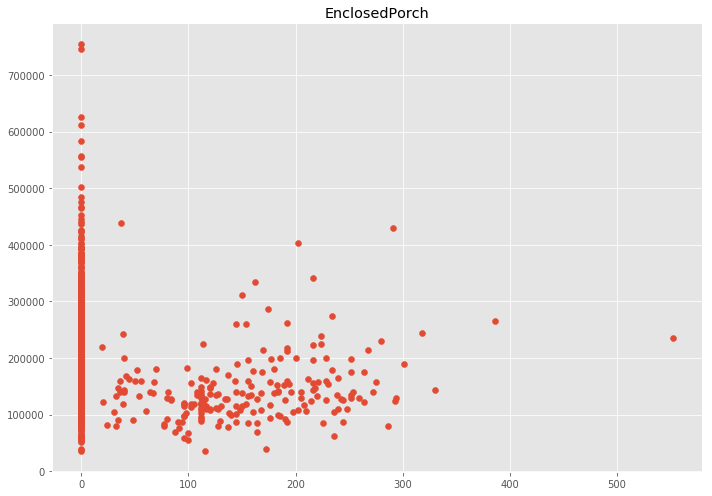

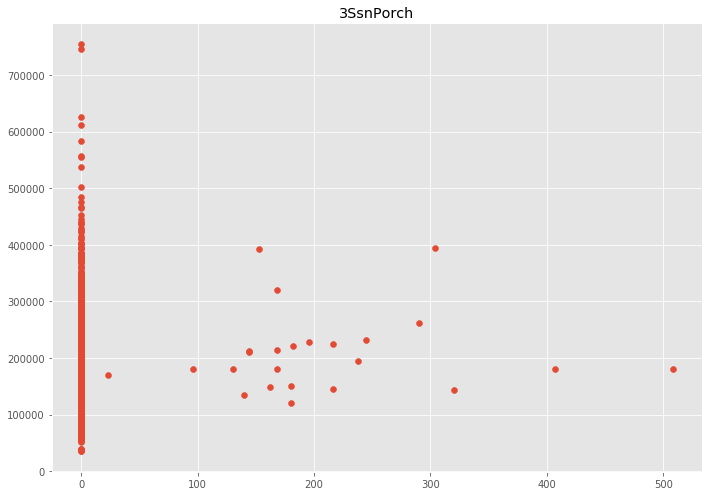

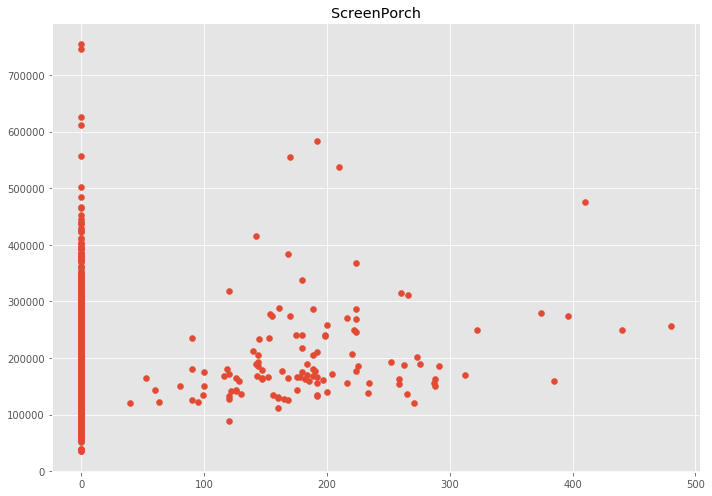

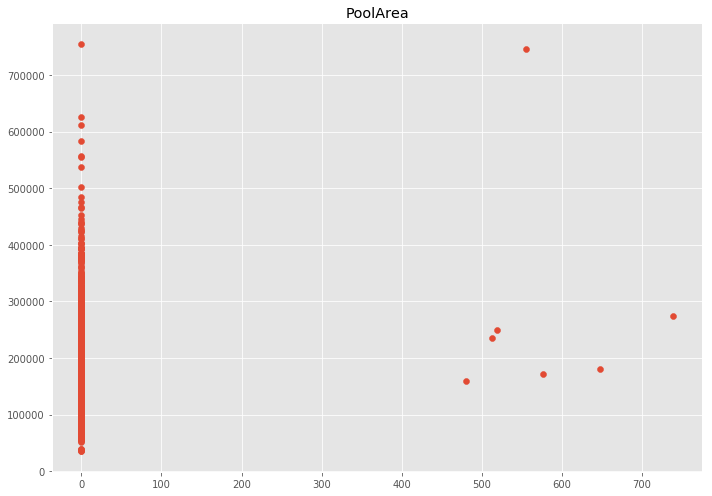

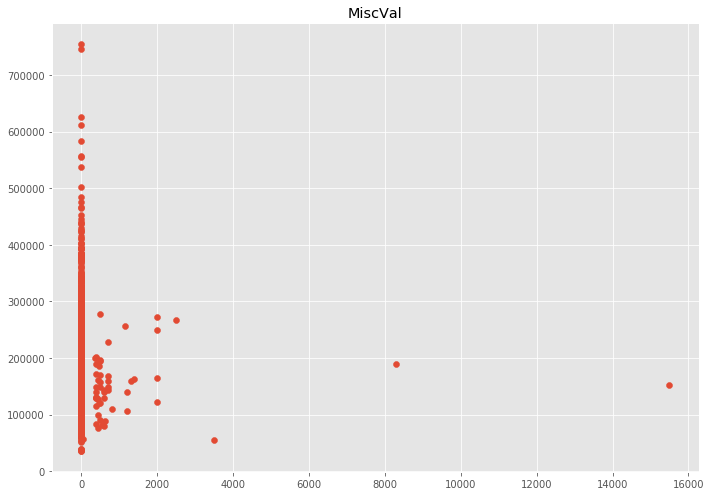

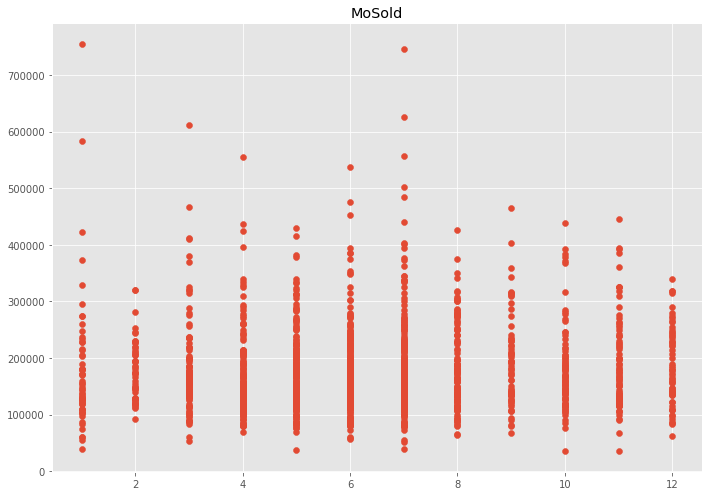

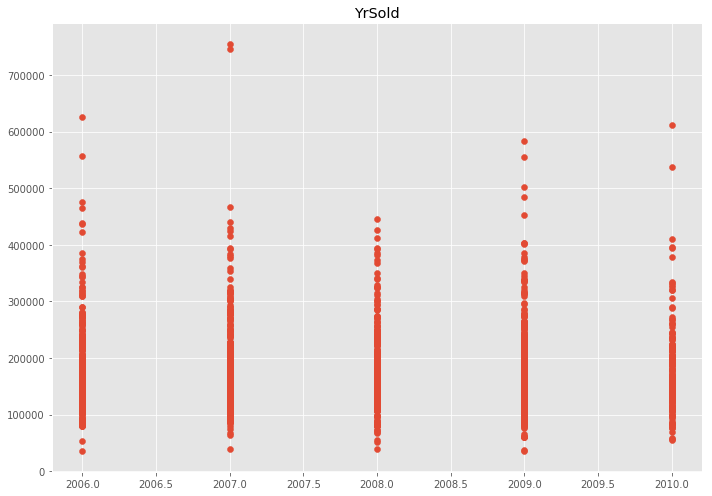

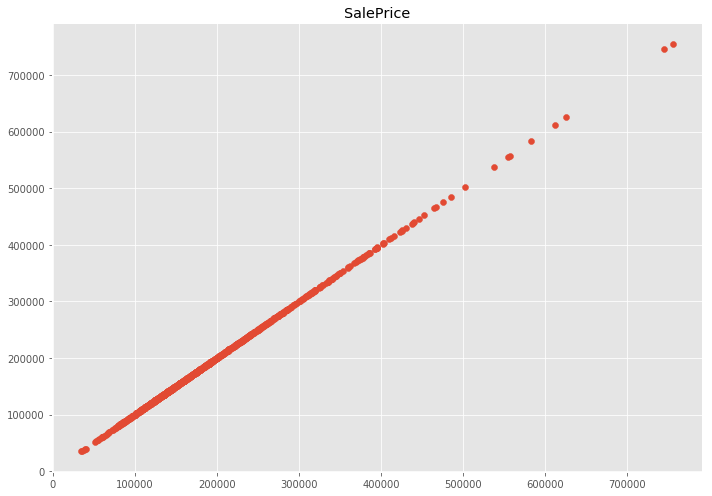

In [13]:
dff_continuous=df.copy()
types=dff_continuous.dtypes
types=types[types!=object]
print(types)
print(types.index)
for i in types.index:
    plt.figure(figsize=(10,7))
    plt.scatter(df[i],df['SalePrice'])
    plt.title(i)
    plt.tight_layout()
    plt.style.use('ggplot')
    plt.show()

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

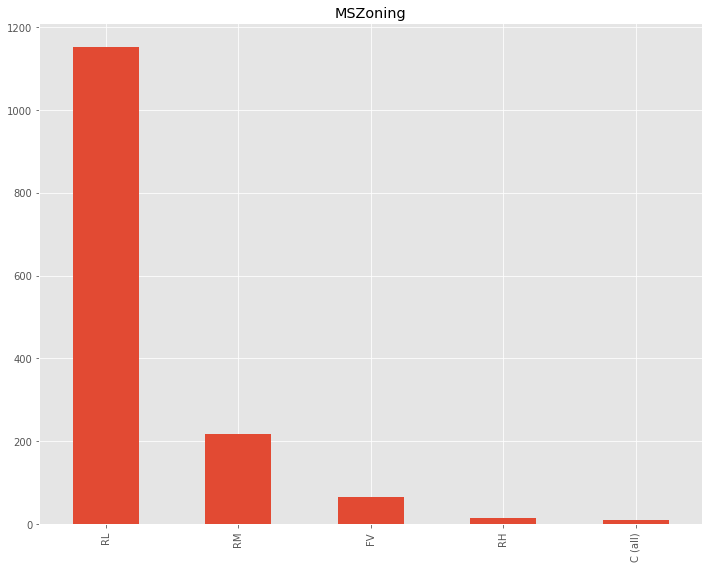

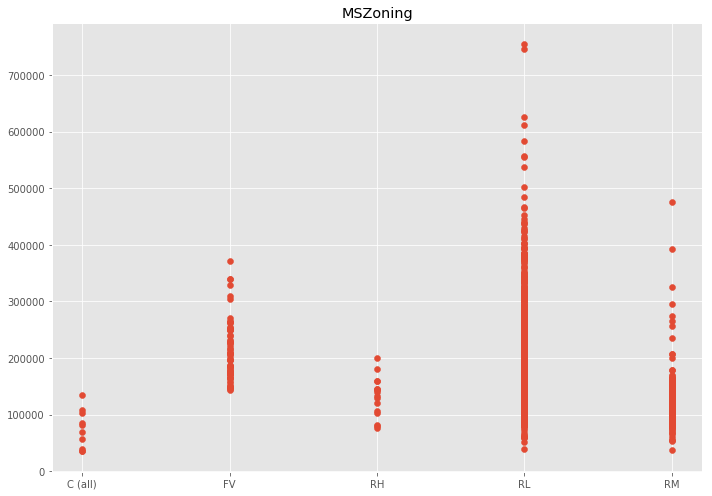

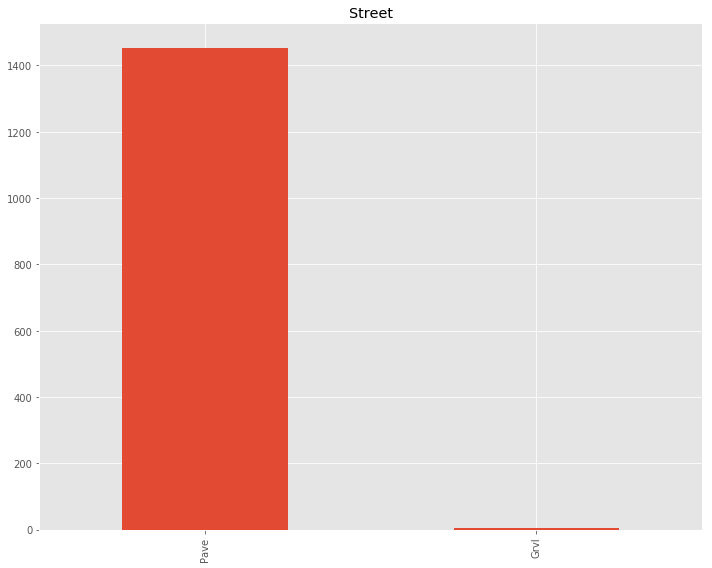

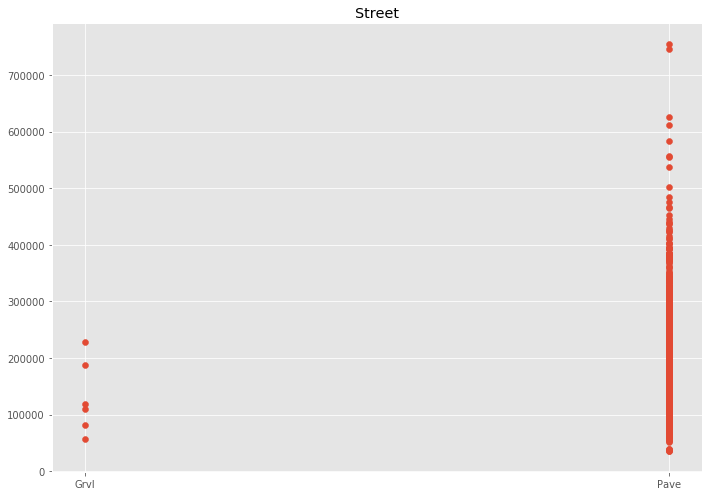

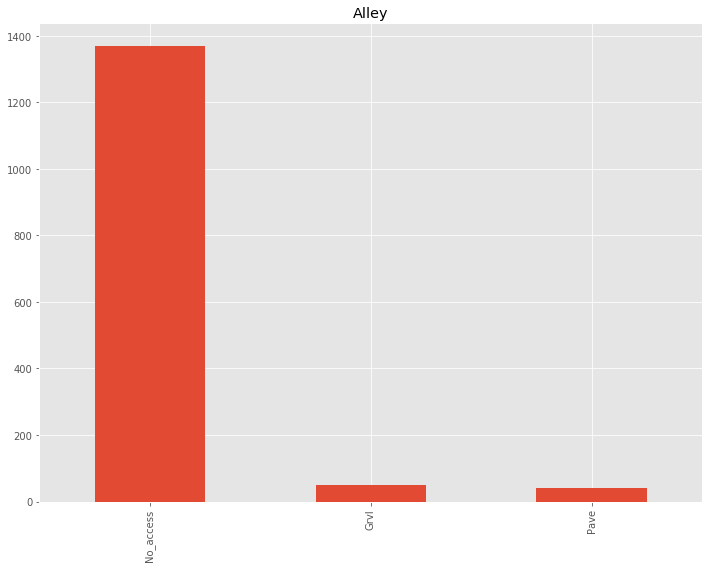

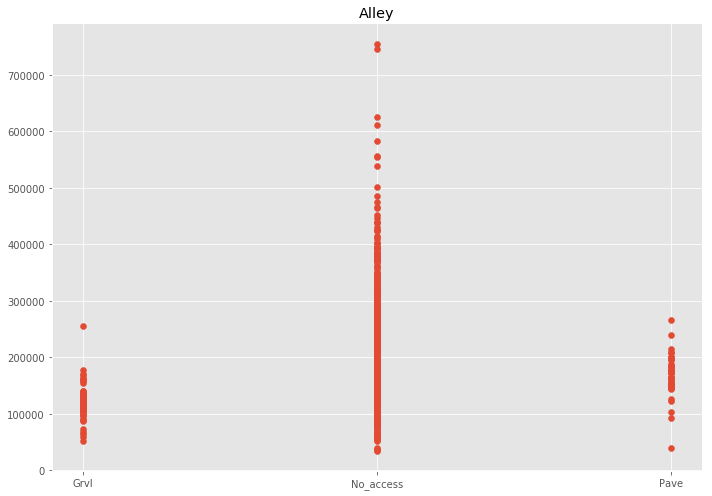

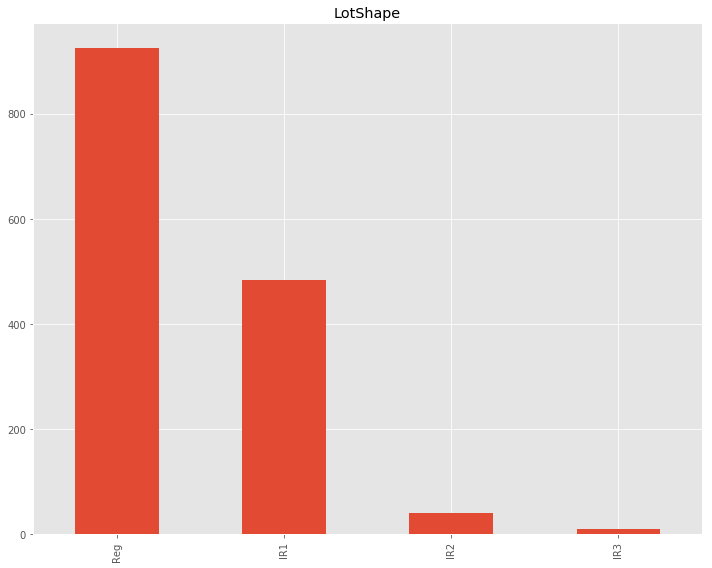

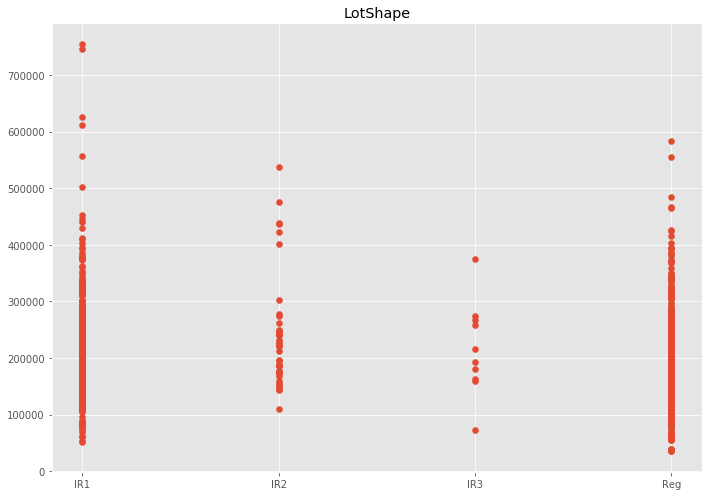

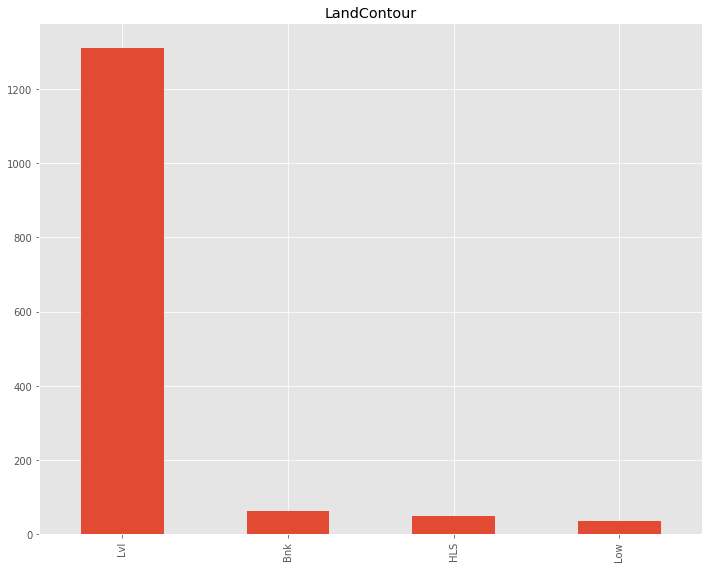

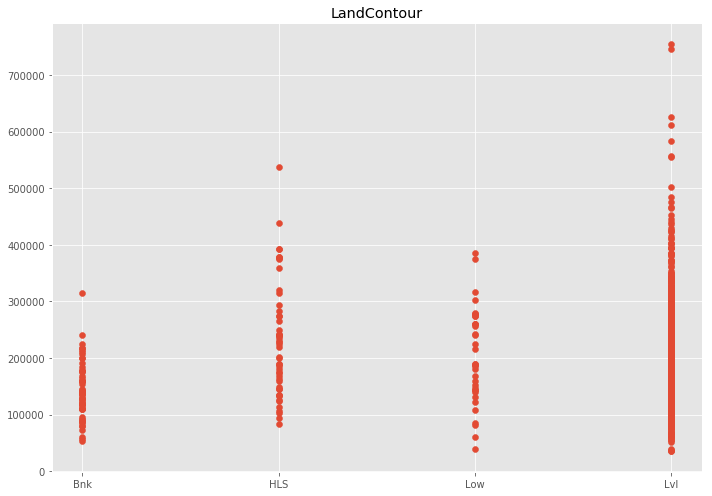

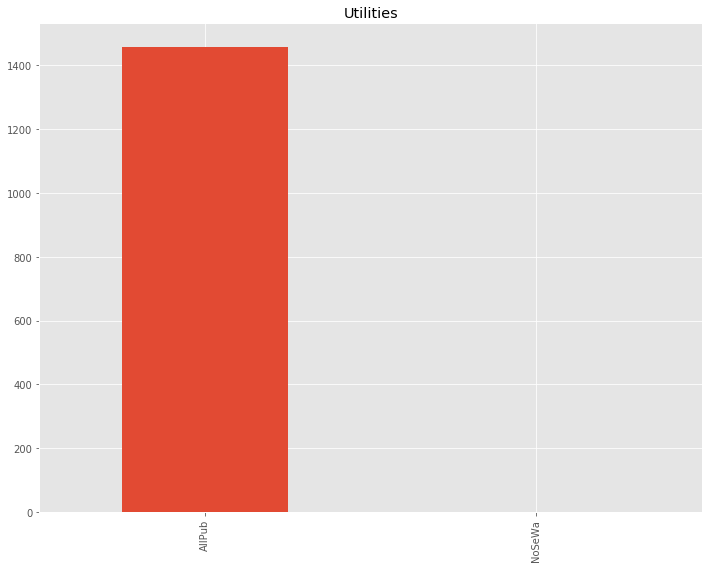

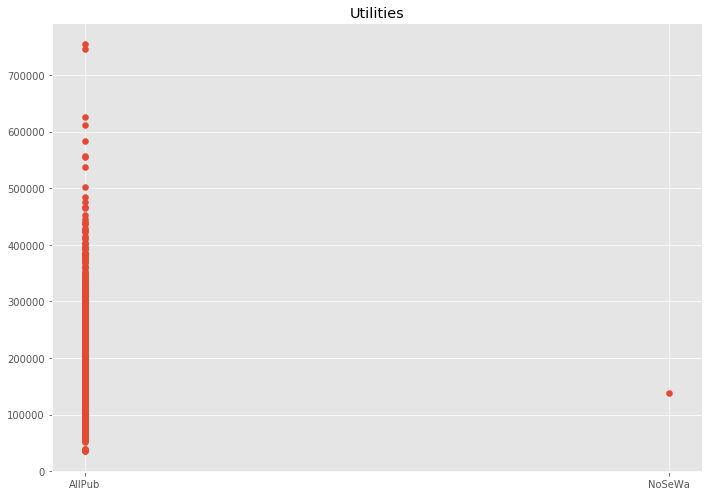

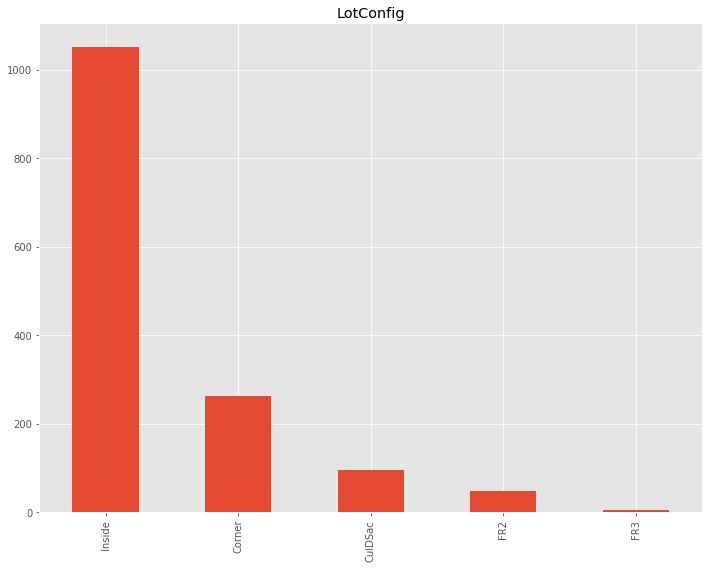

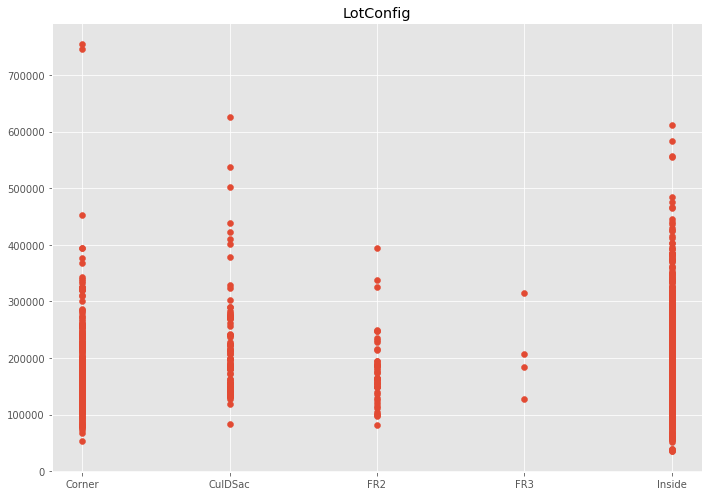

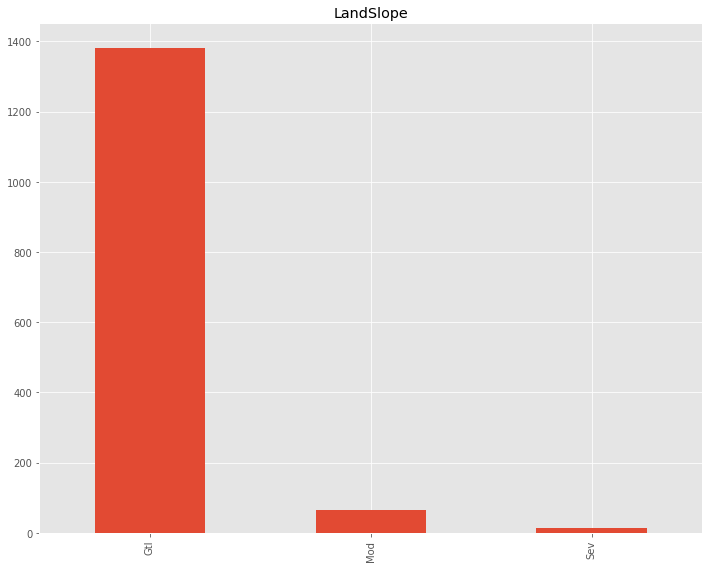

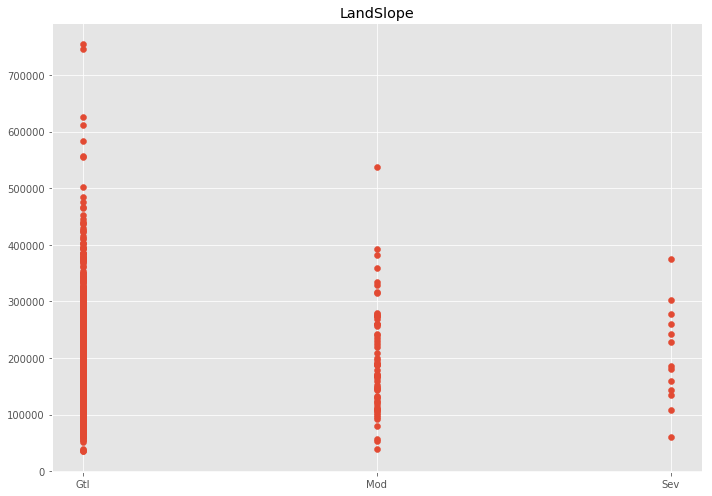

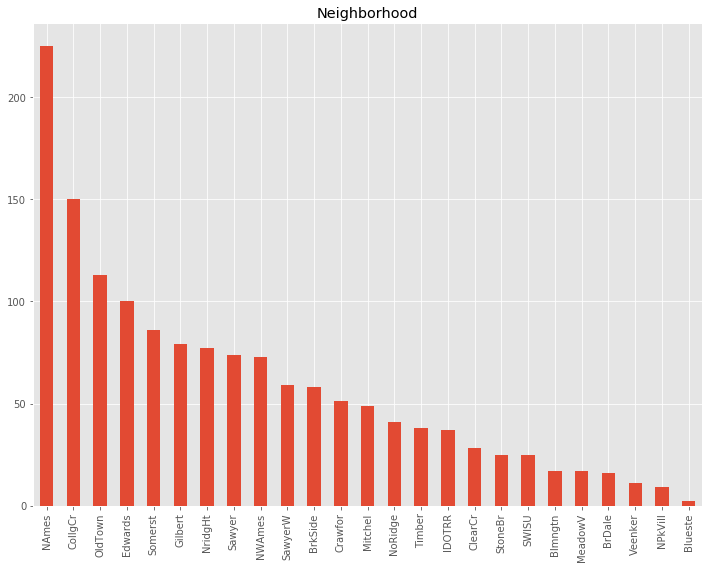

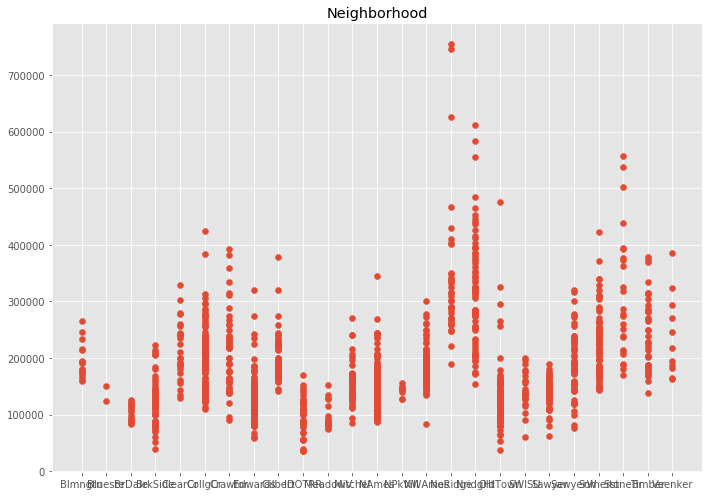

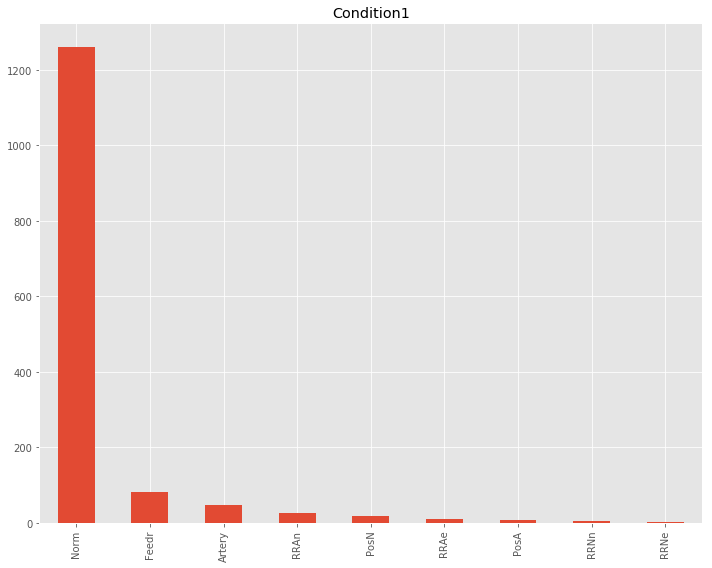

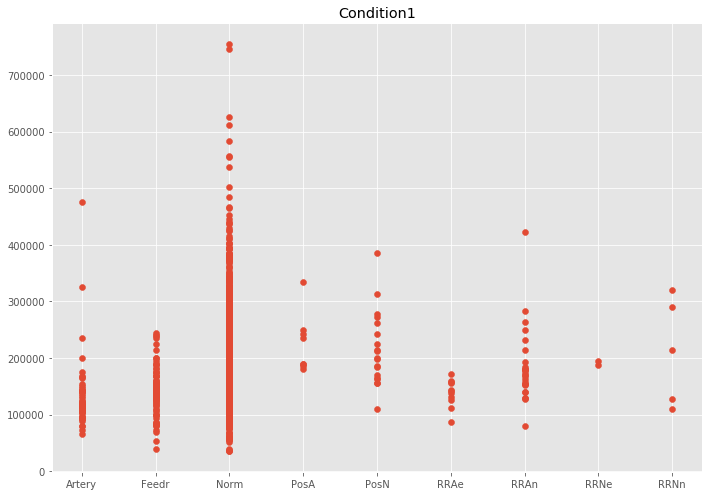

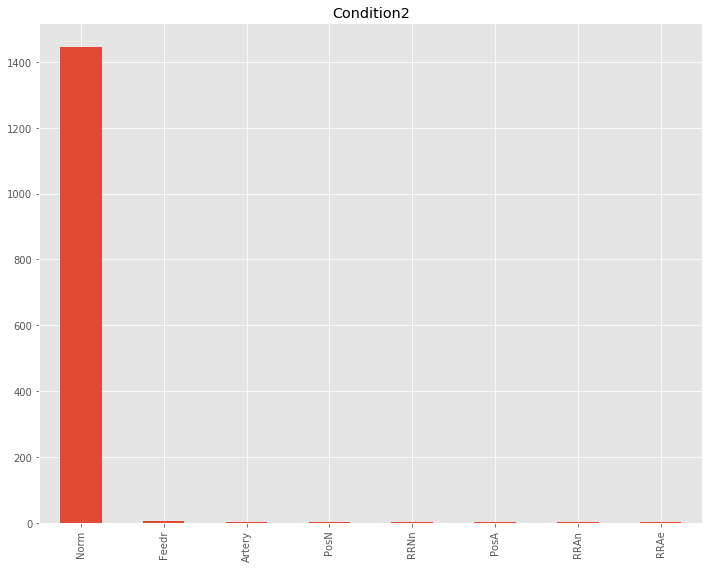

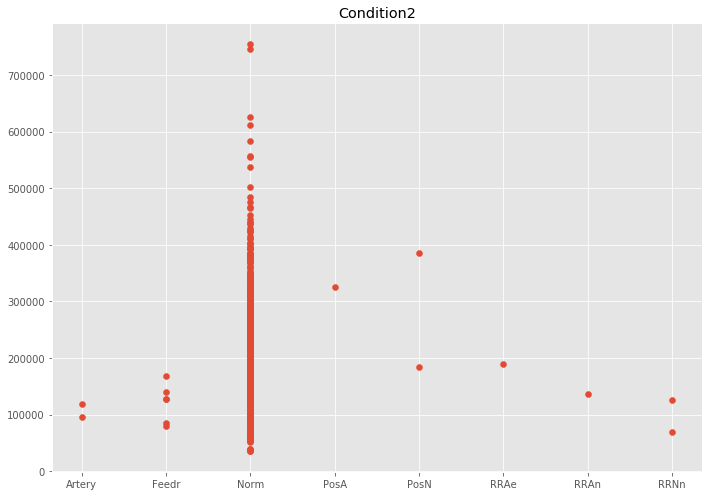

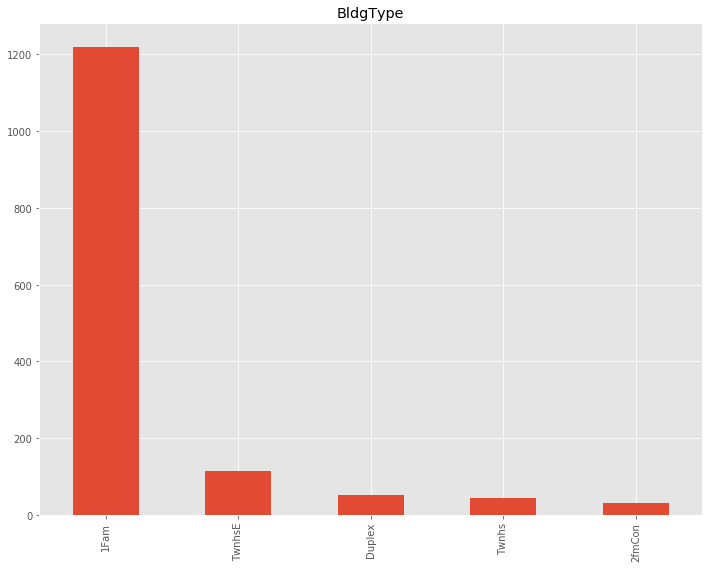

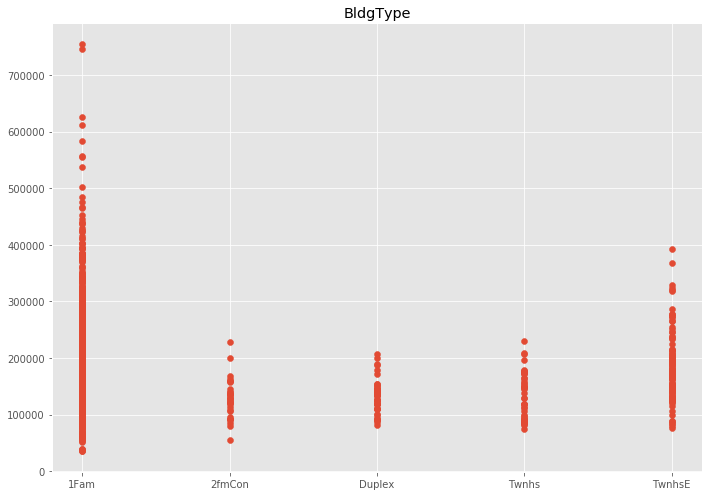

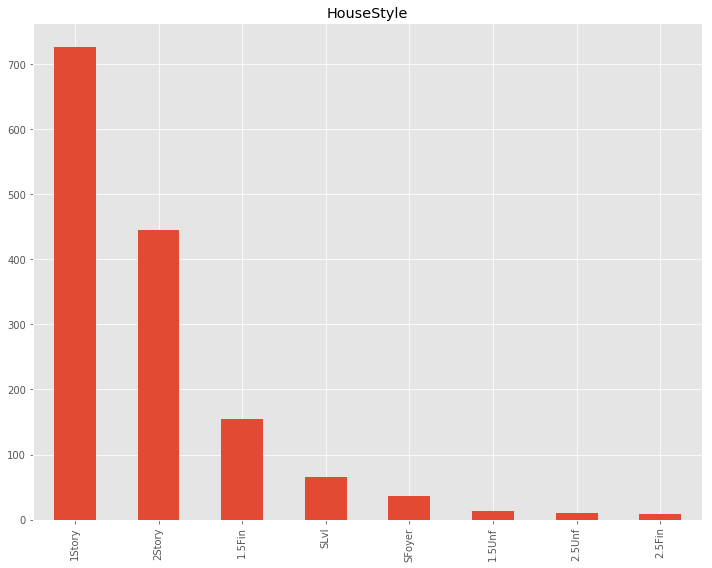

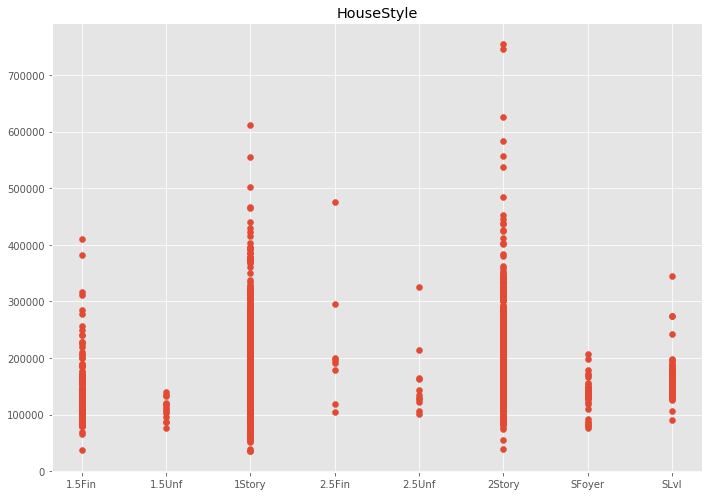

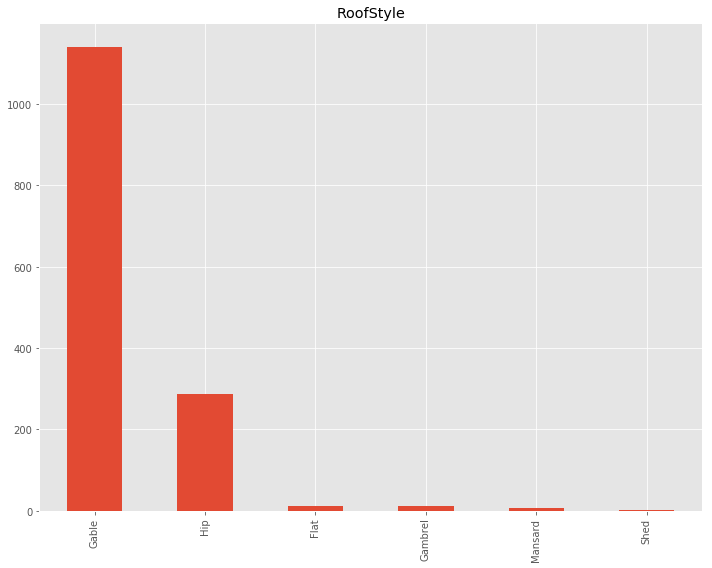

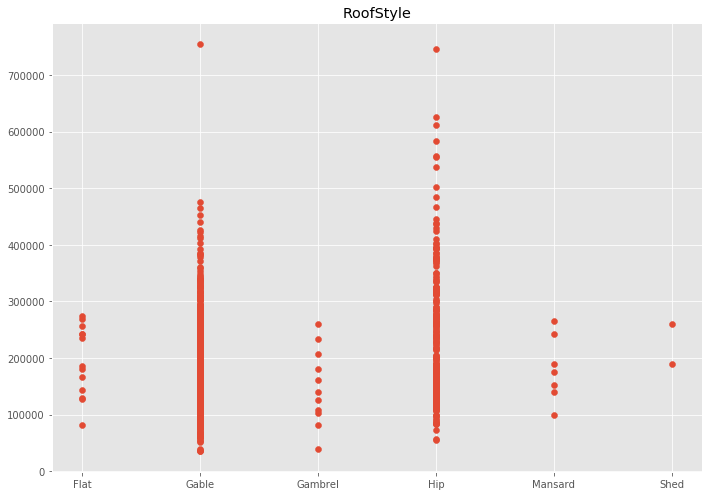

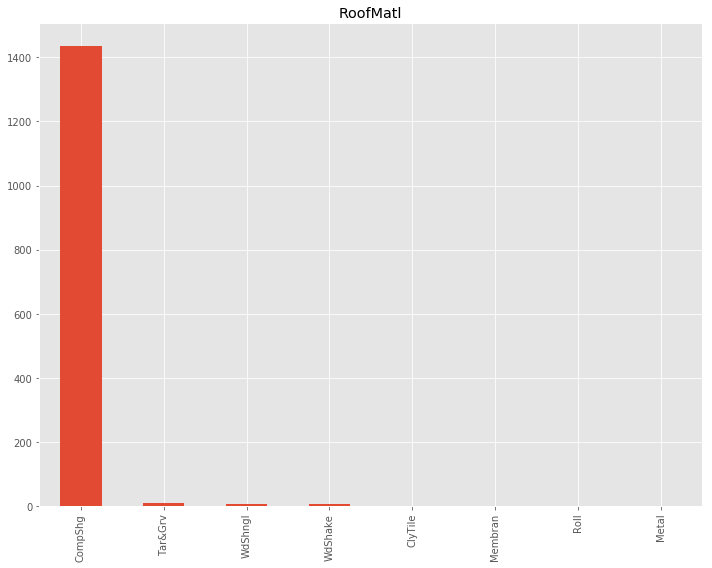

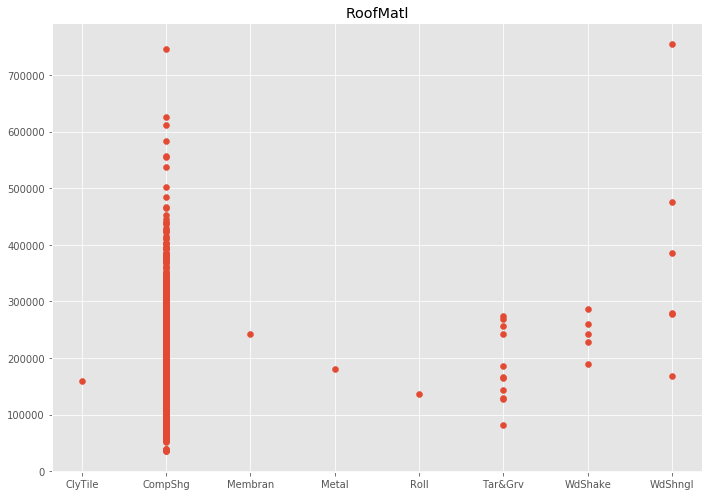

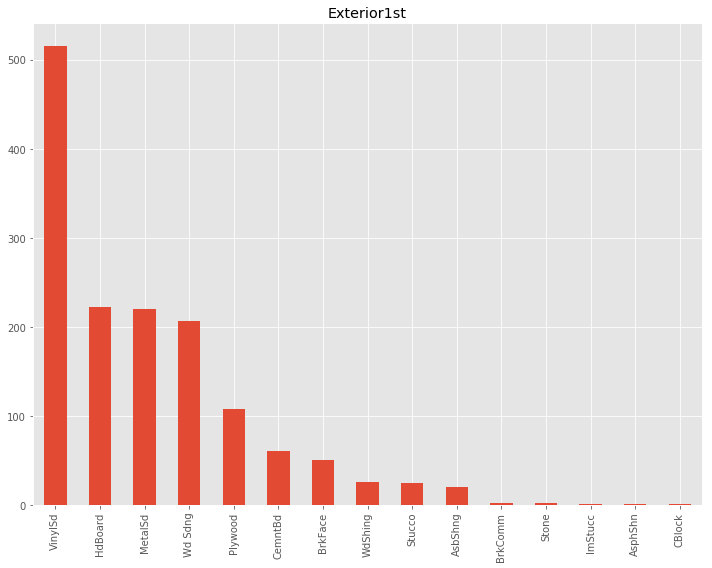

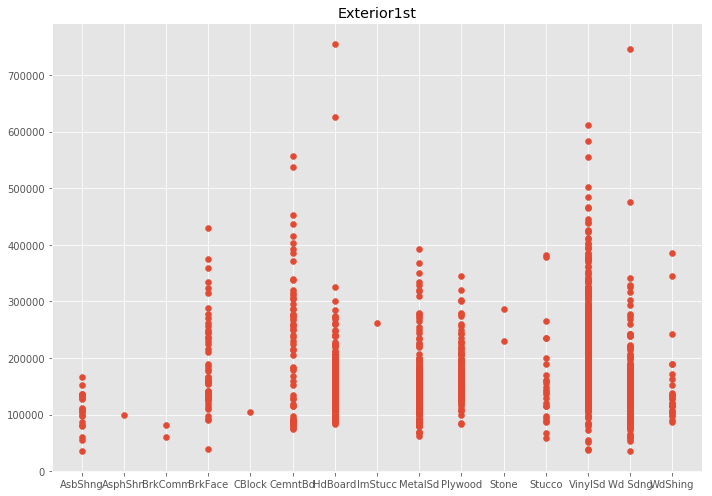

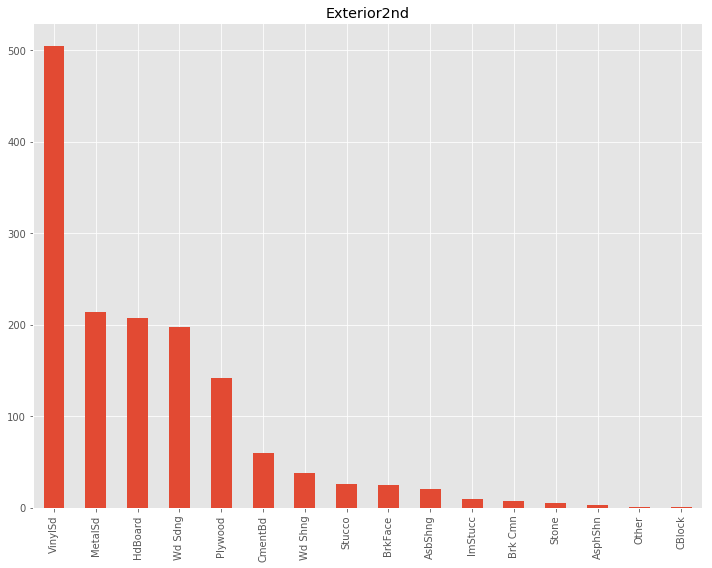

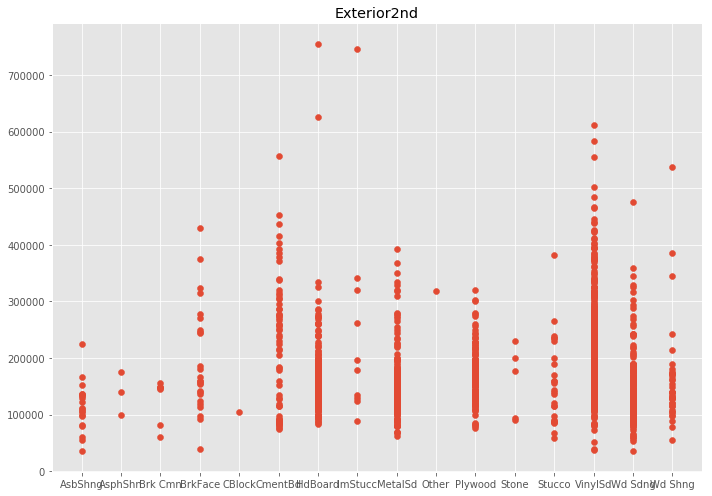

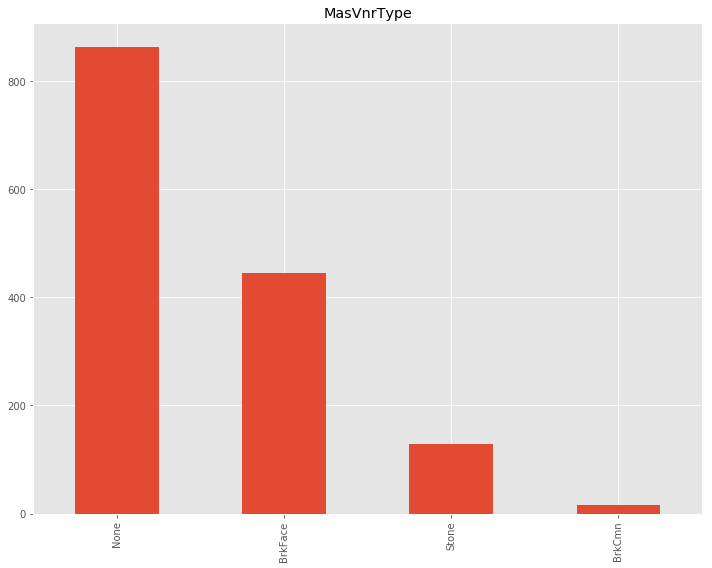

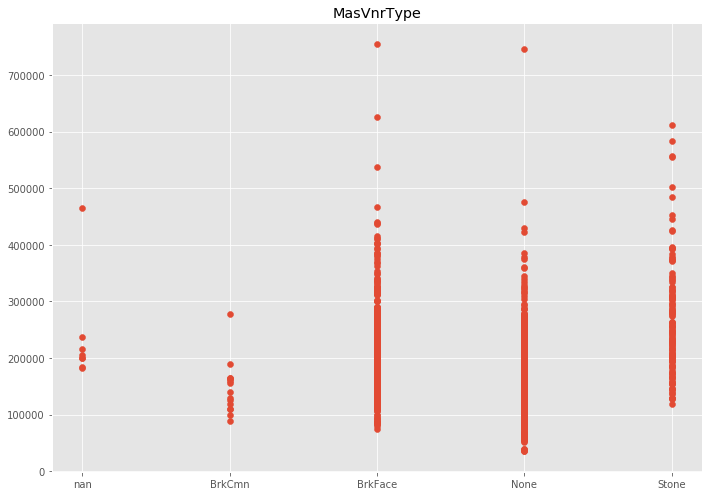

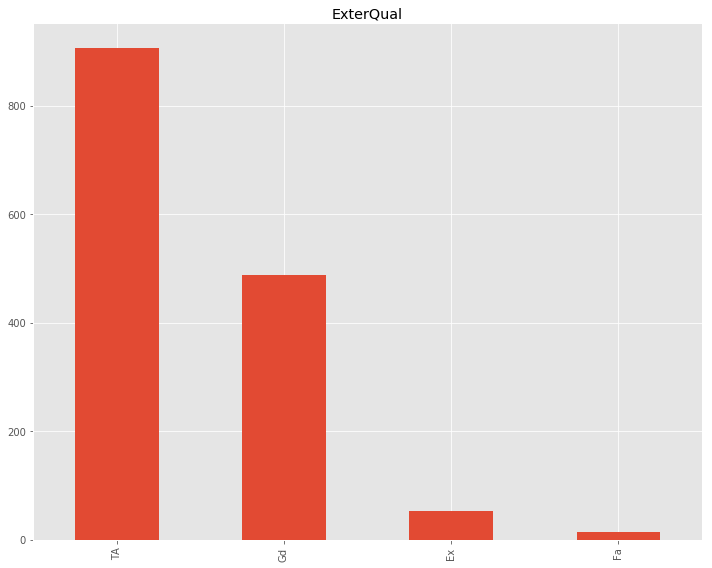

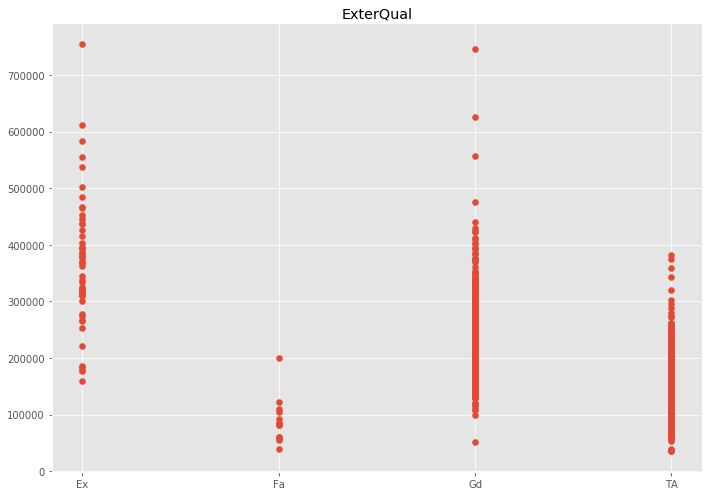

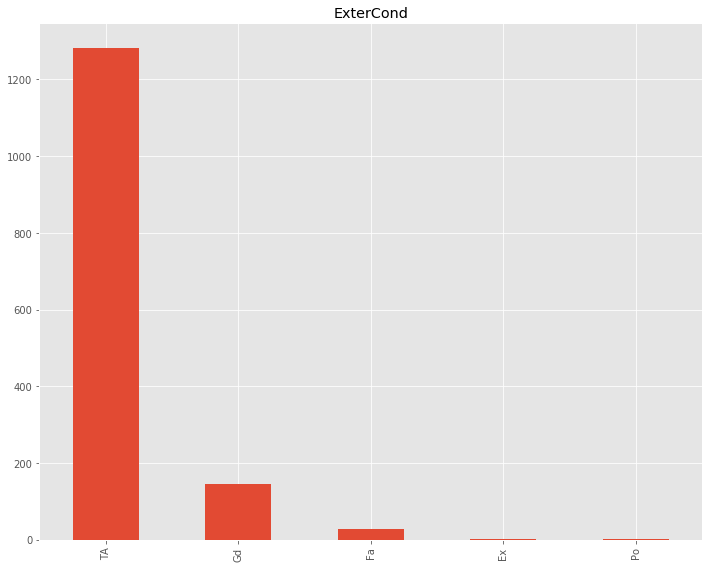

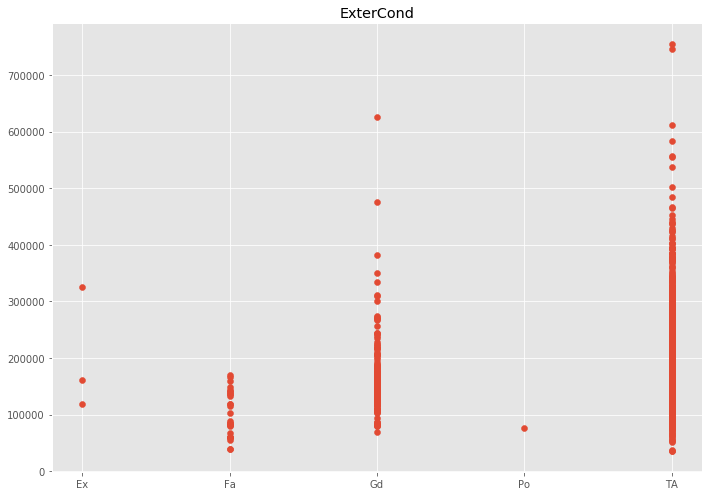

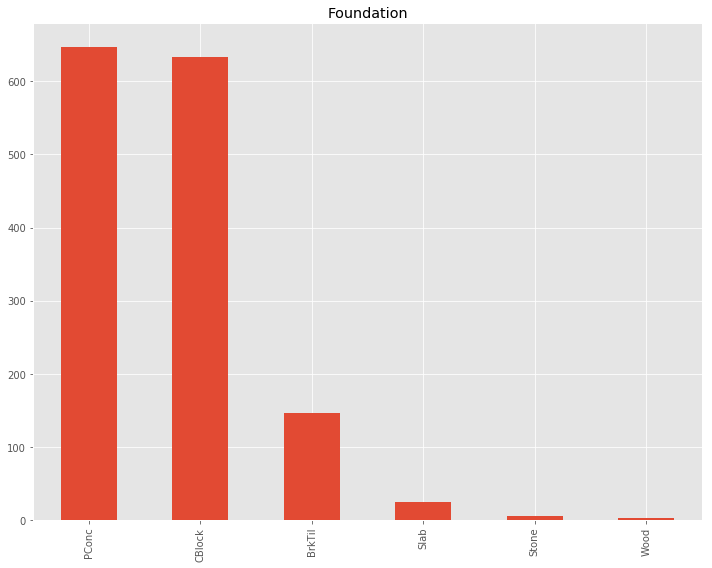

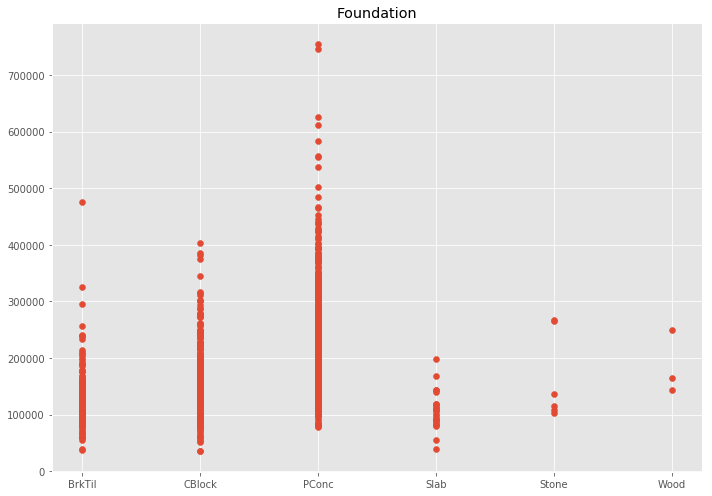

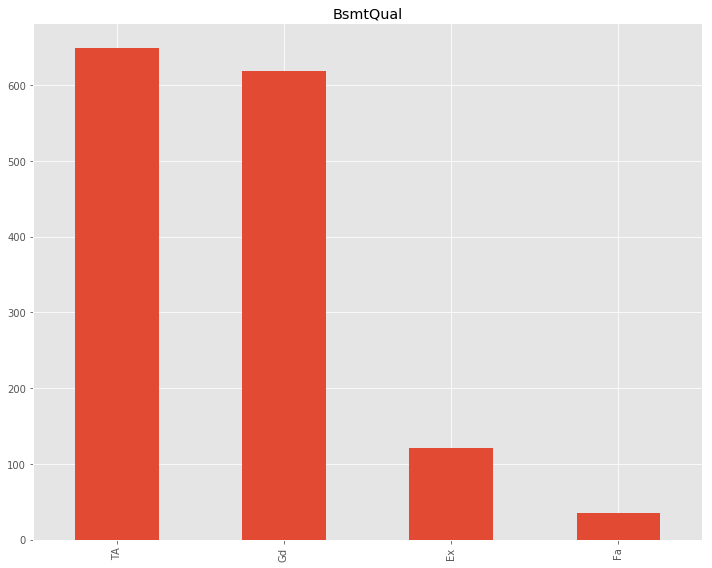

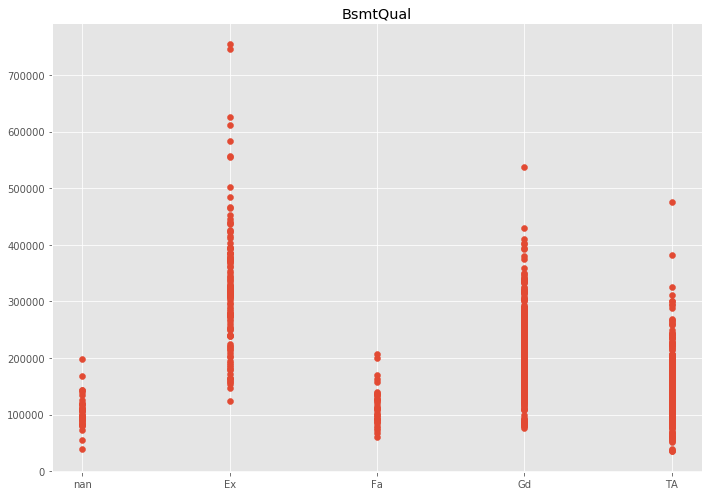

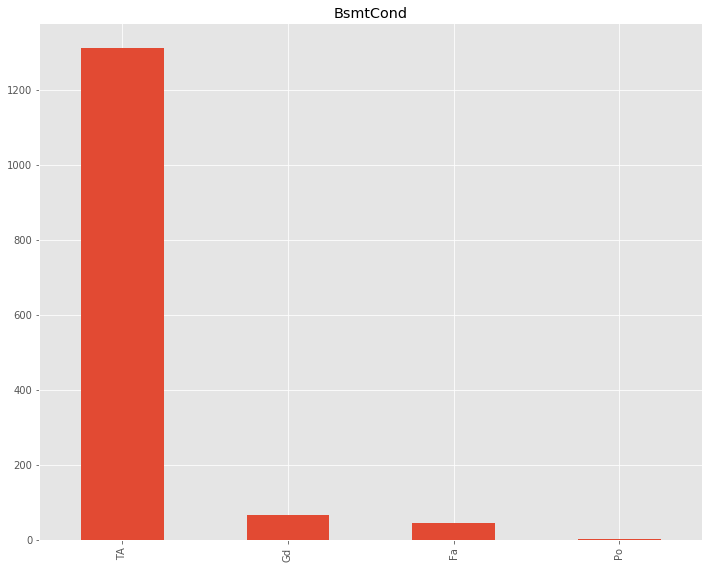

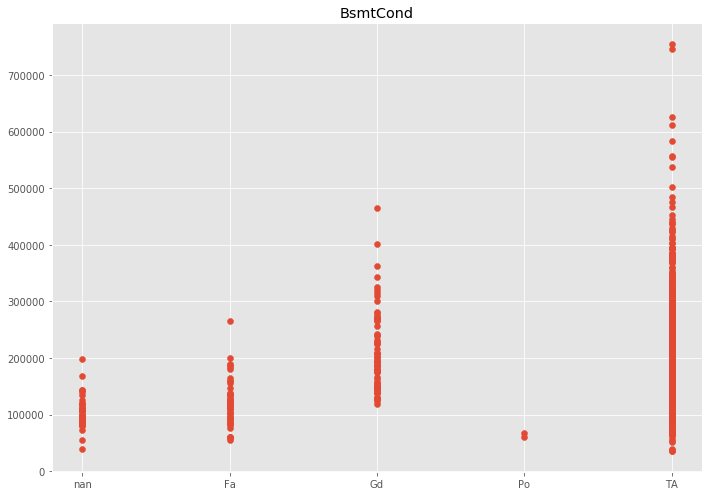

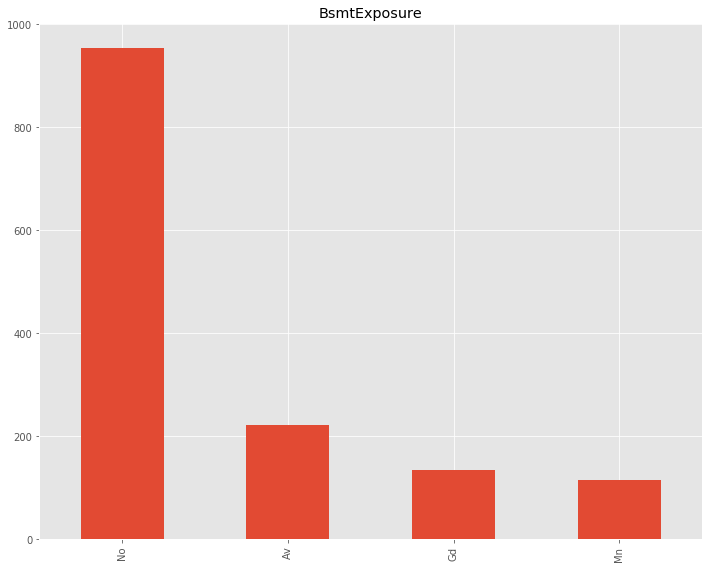

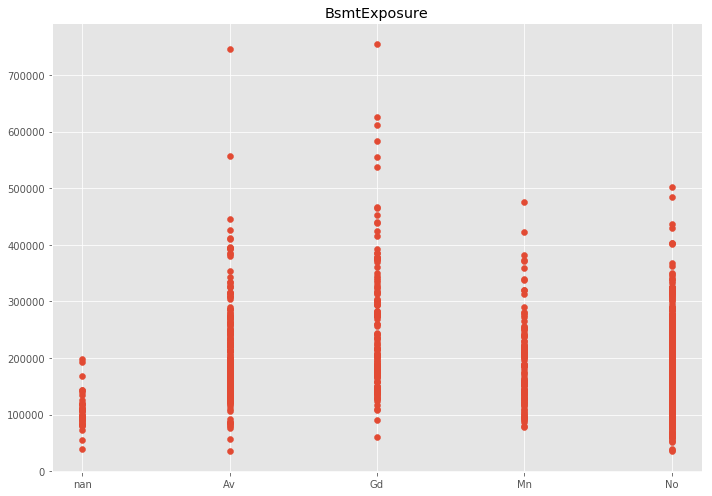

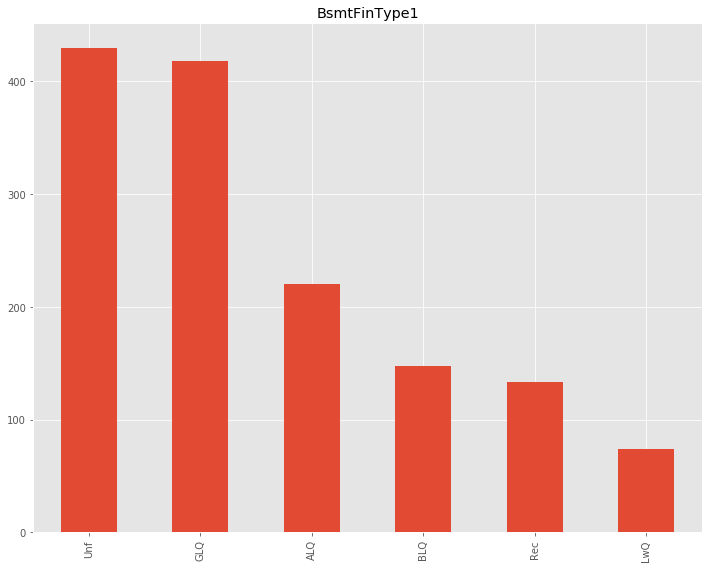

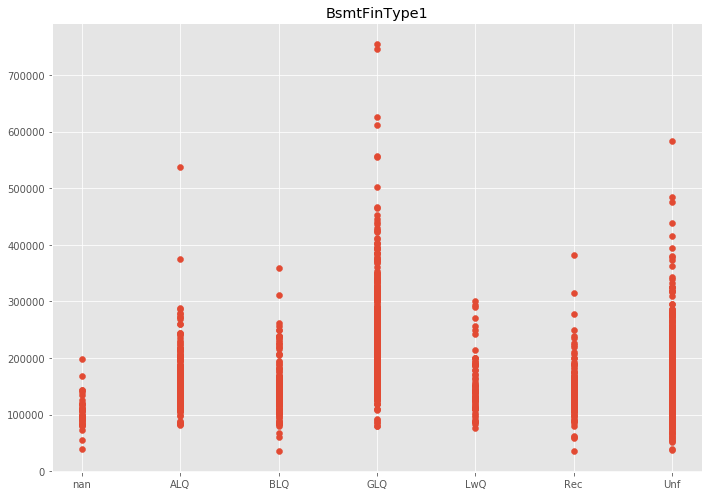

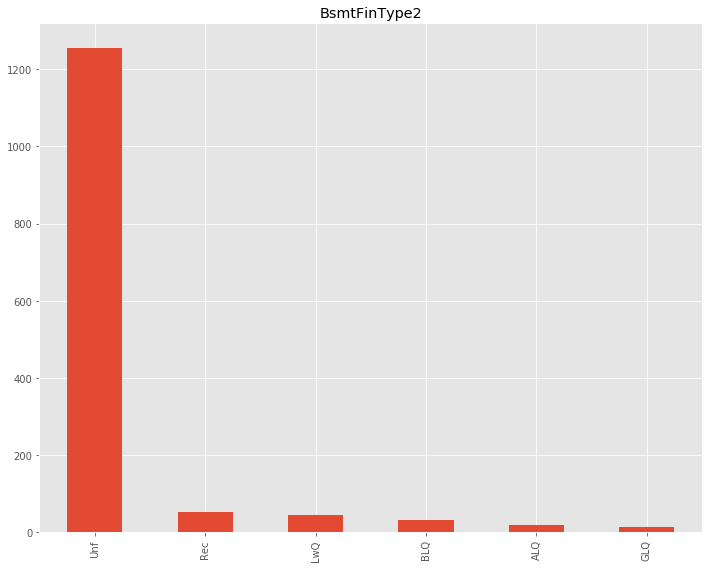

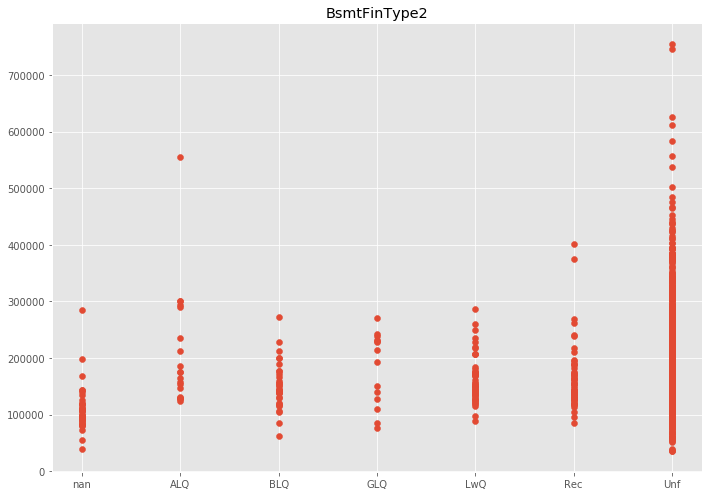

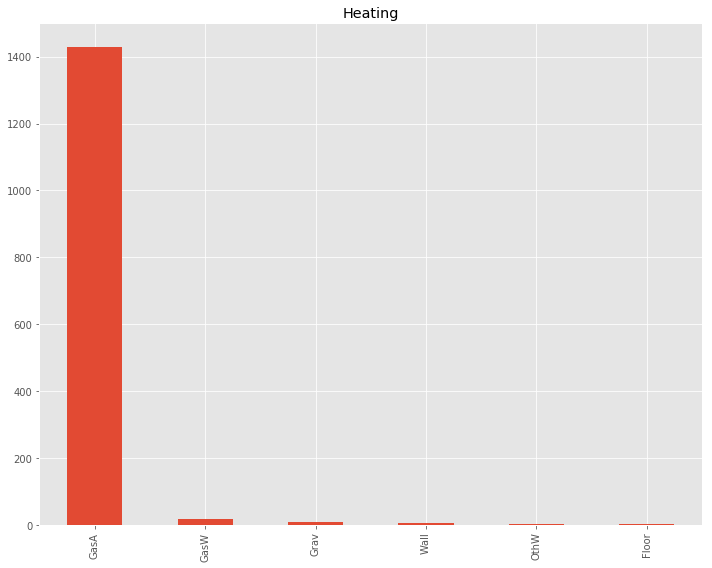

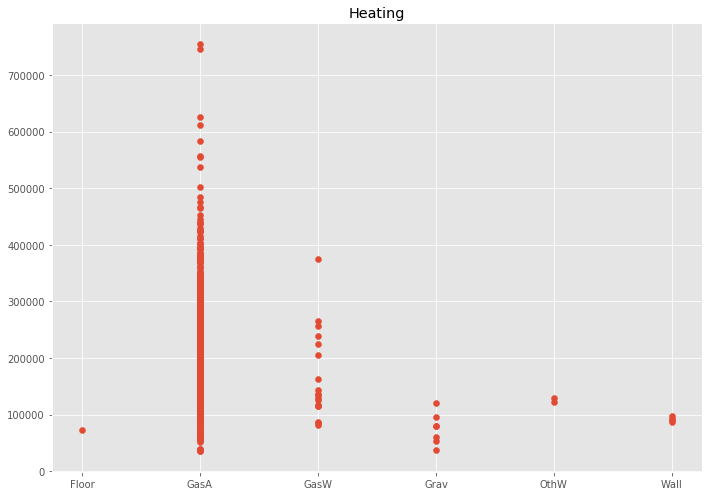

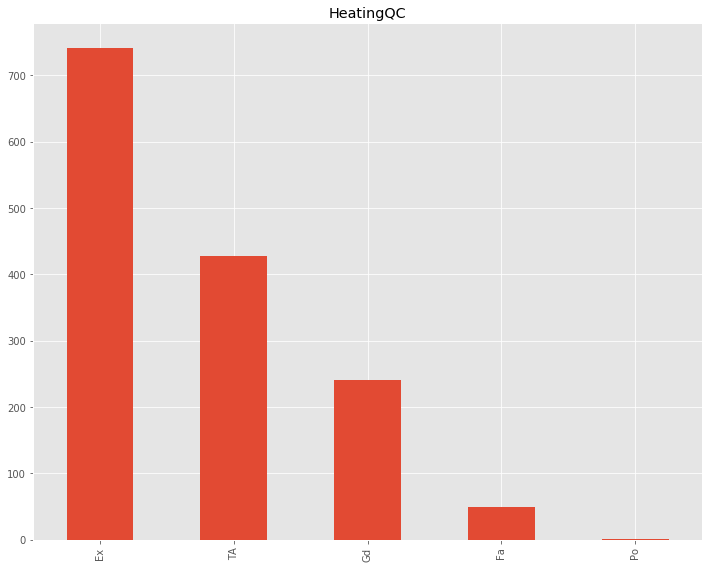

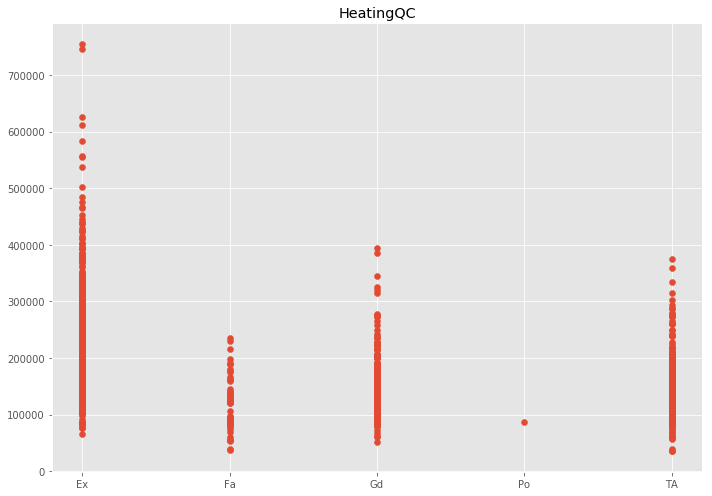

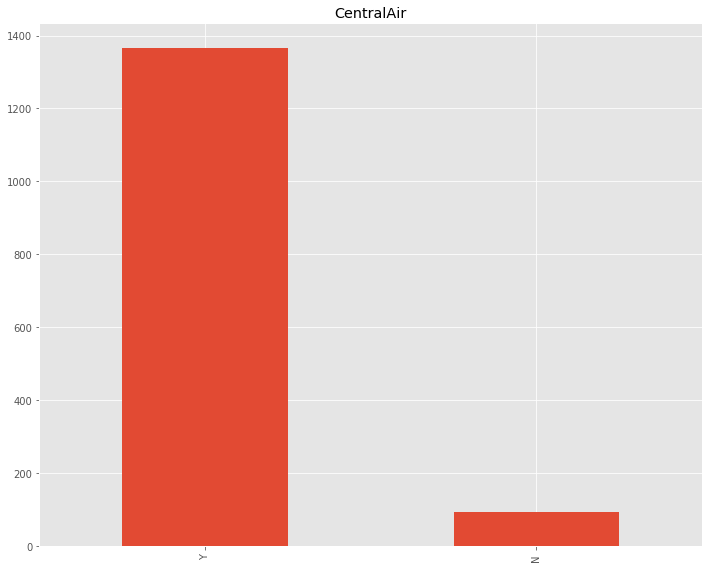

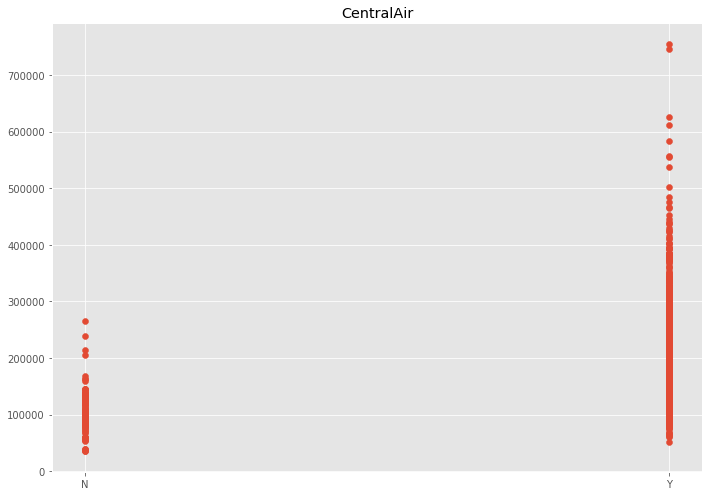

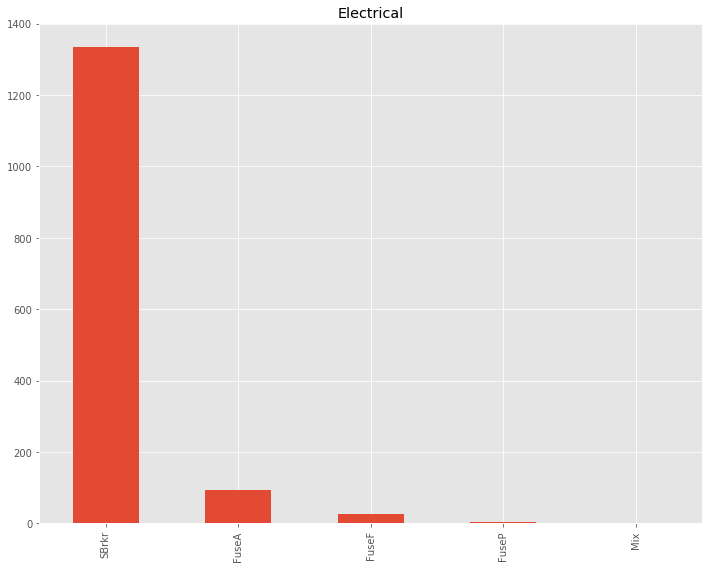

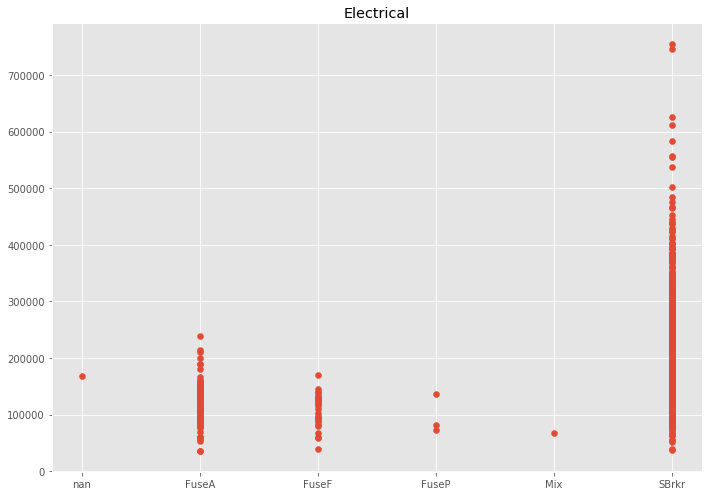

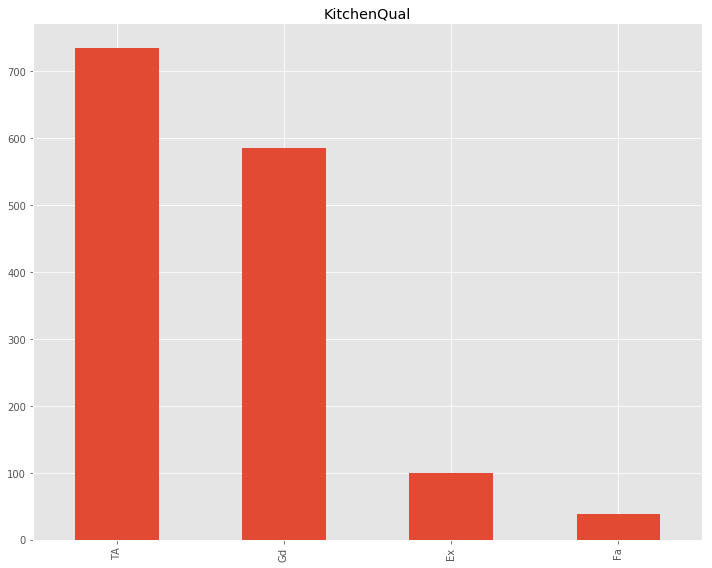

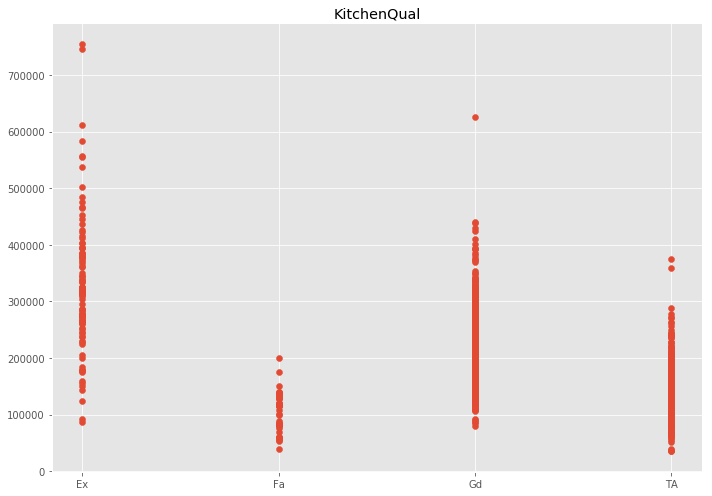

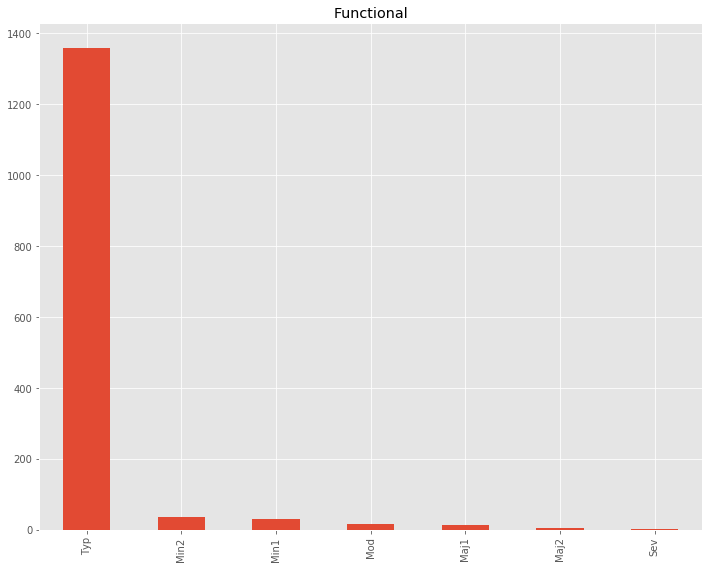

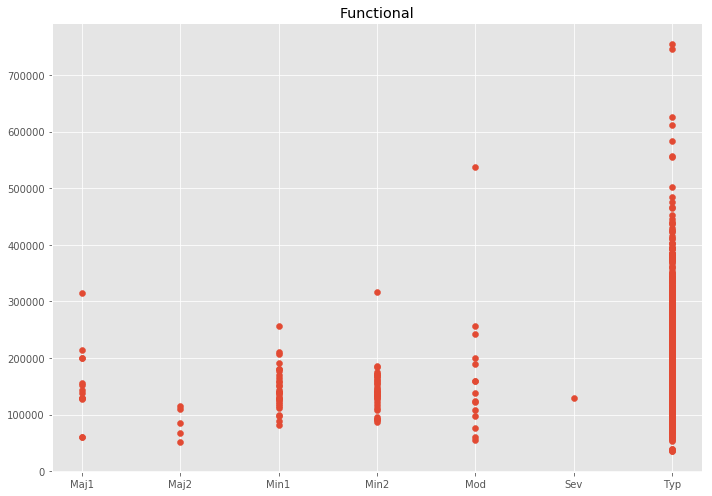

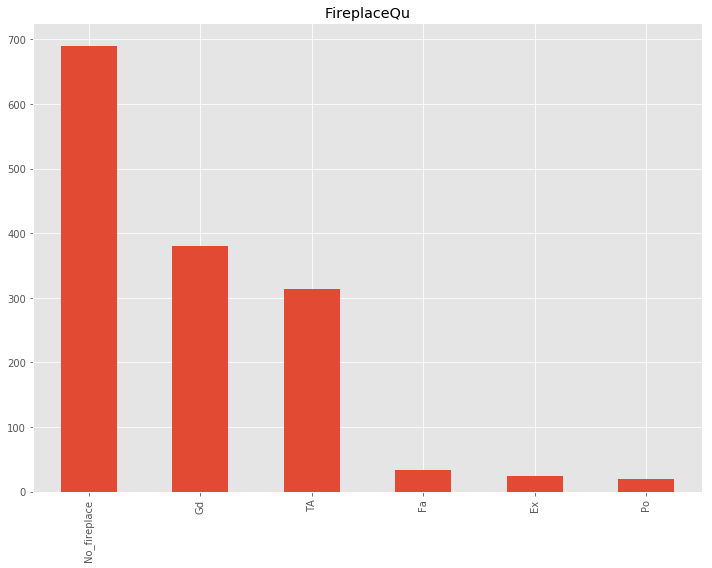

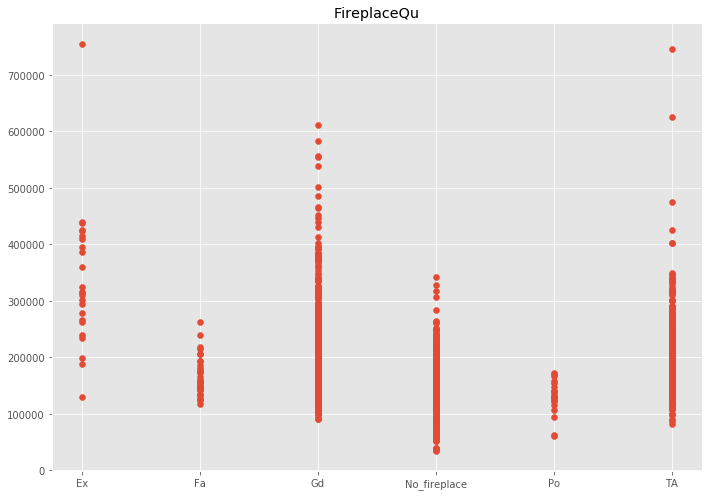

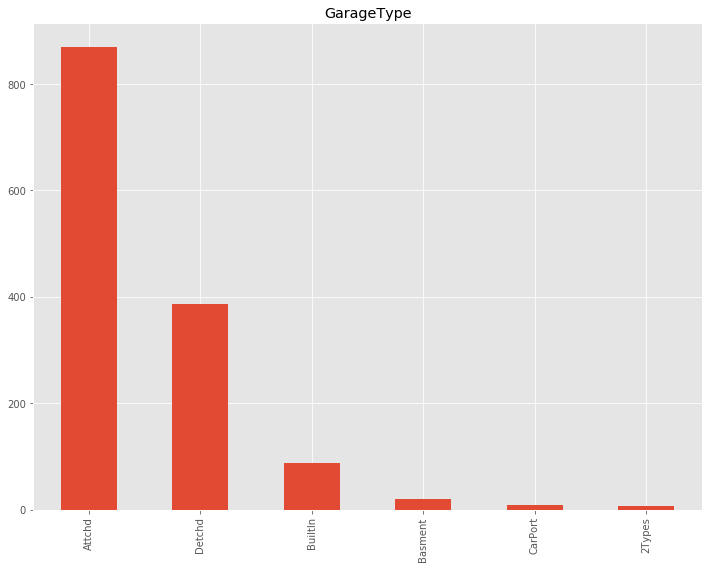

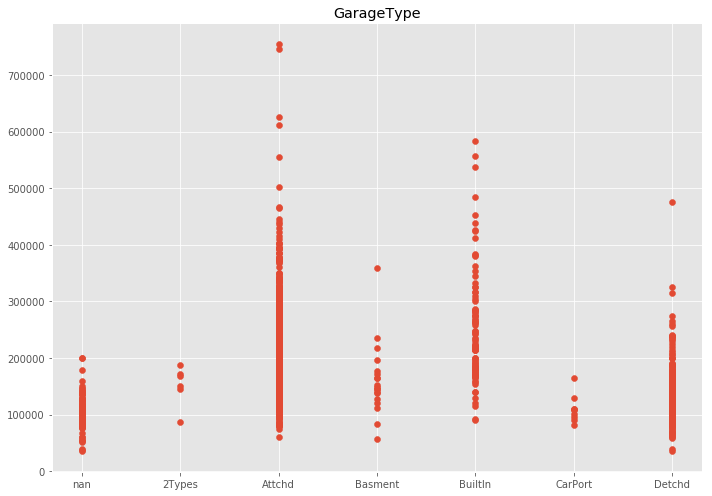

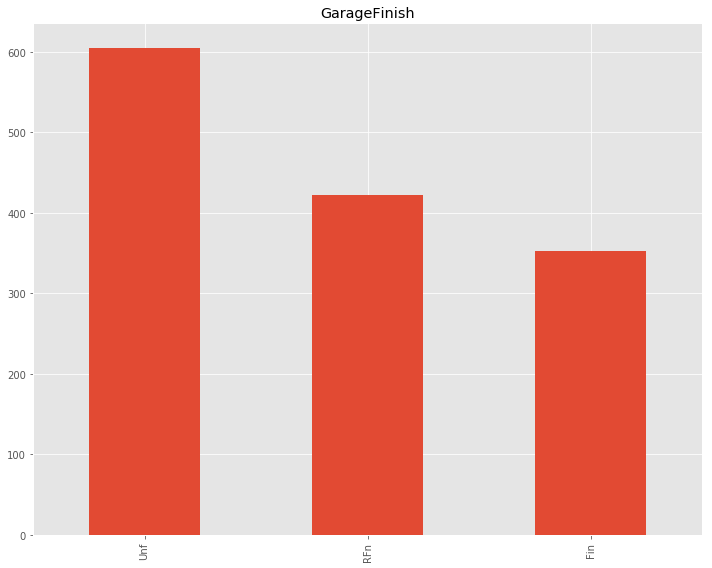

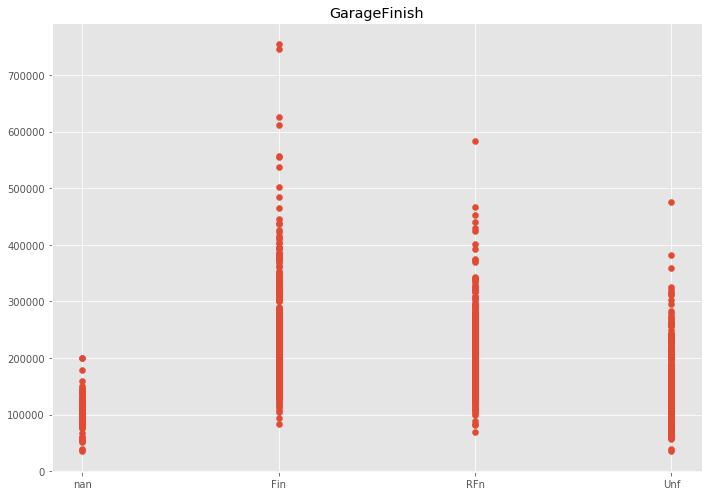

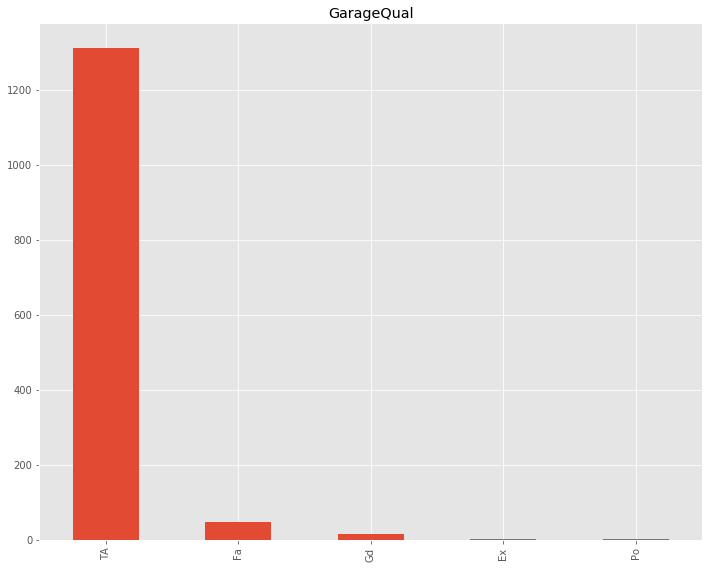

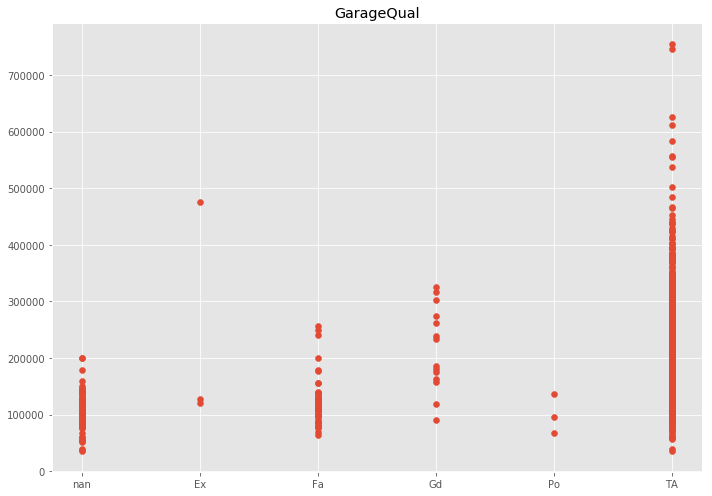

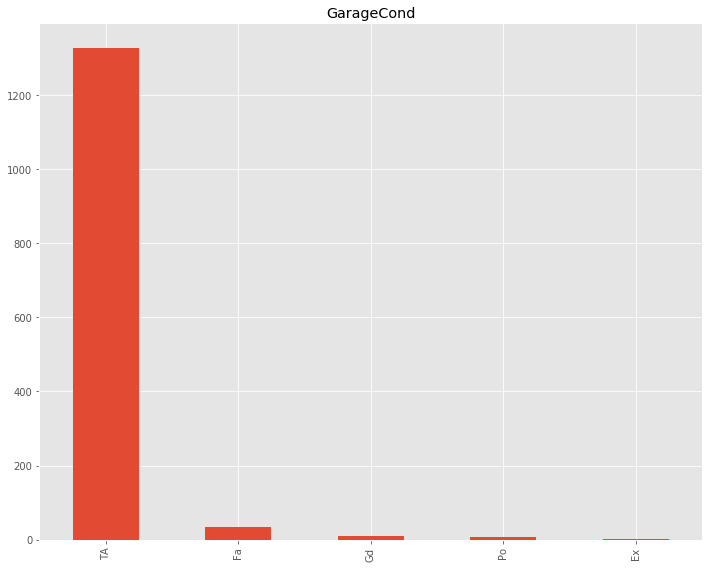

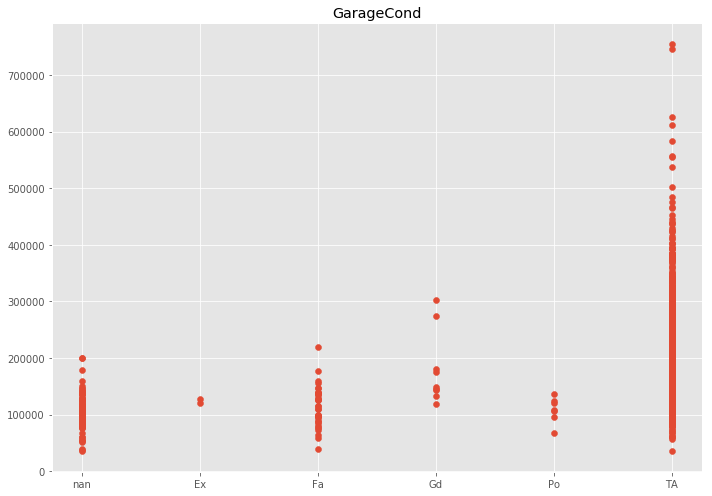

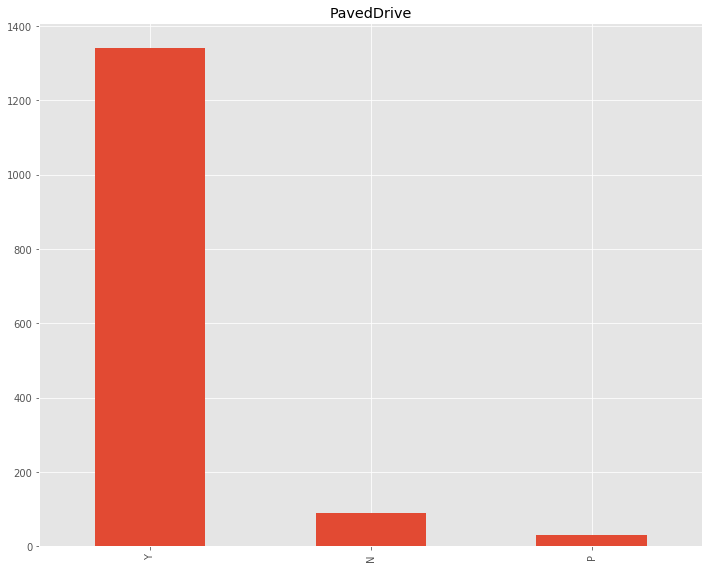

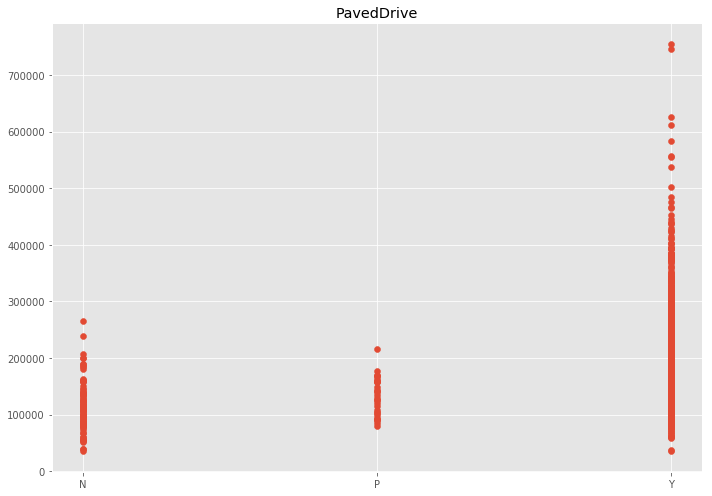

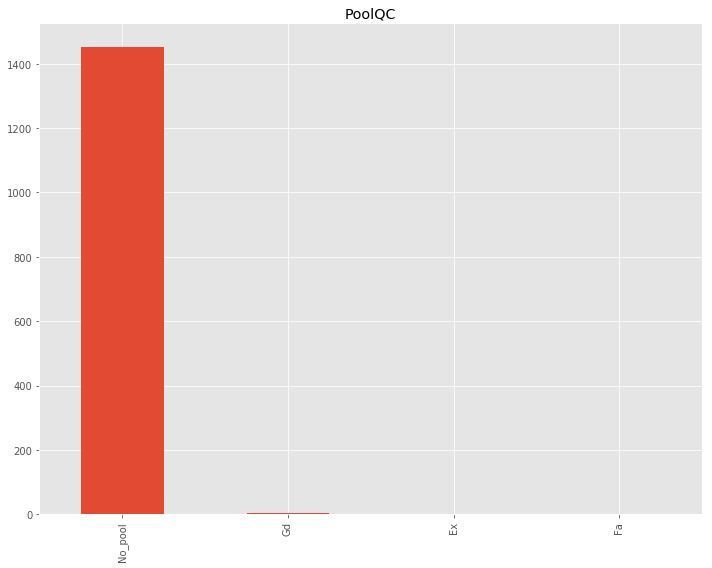

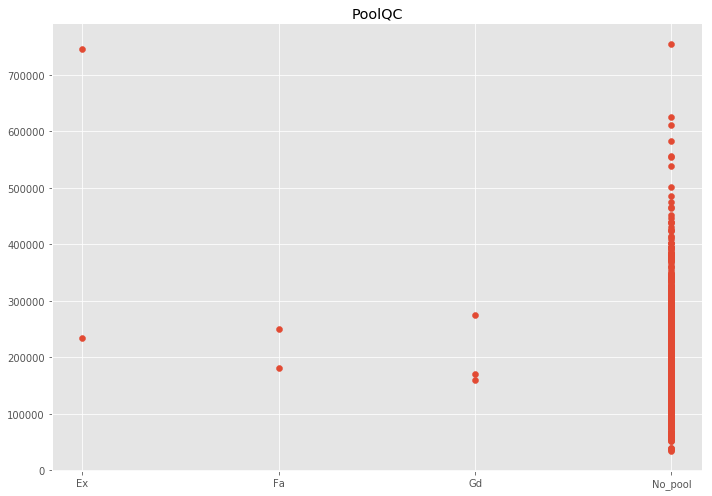

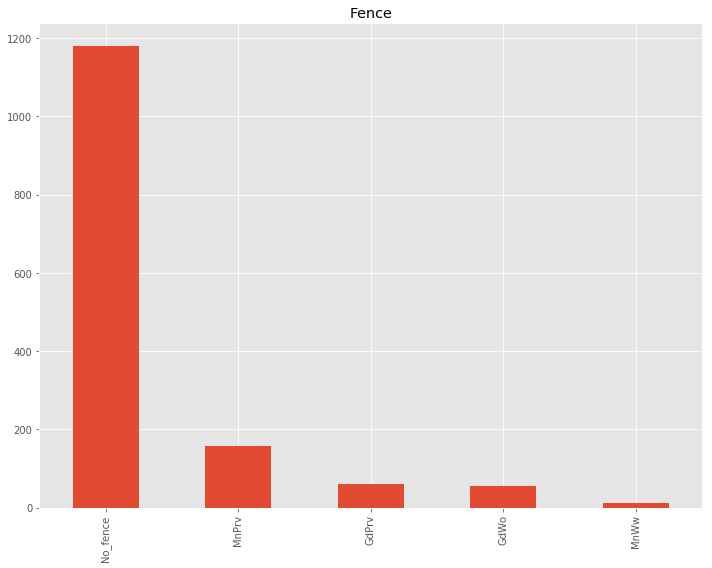

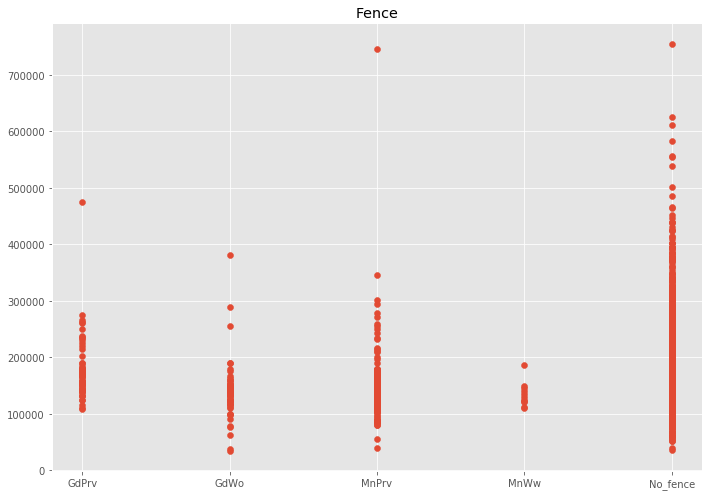

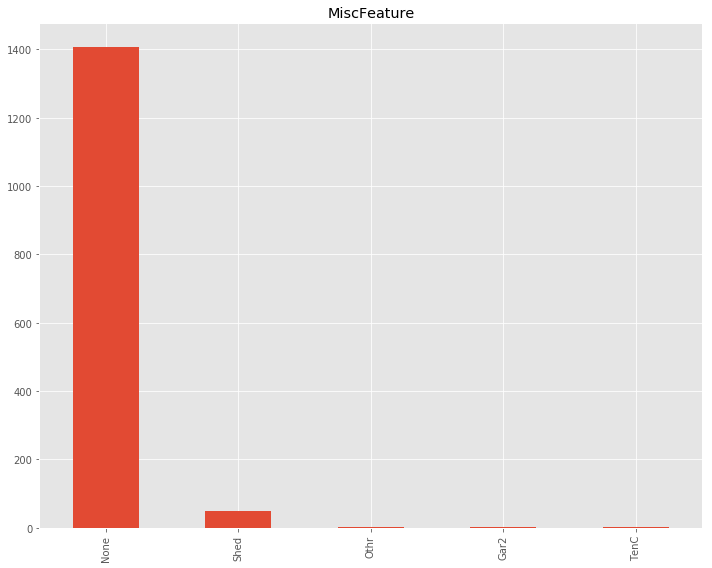

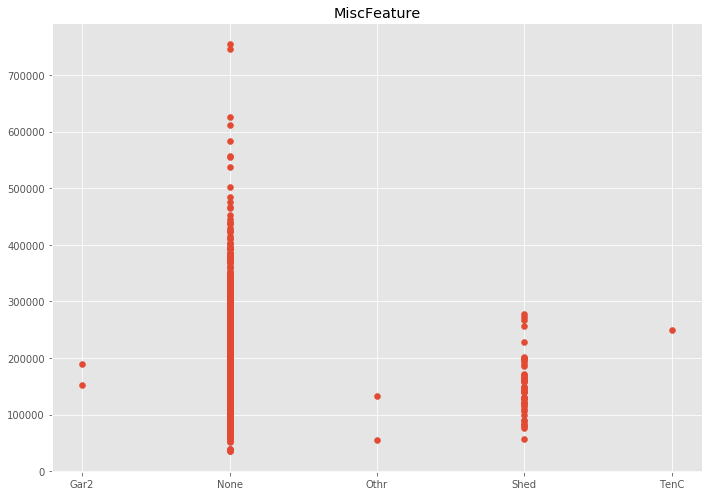

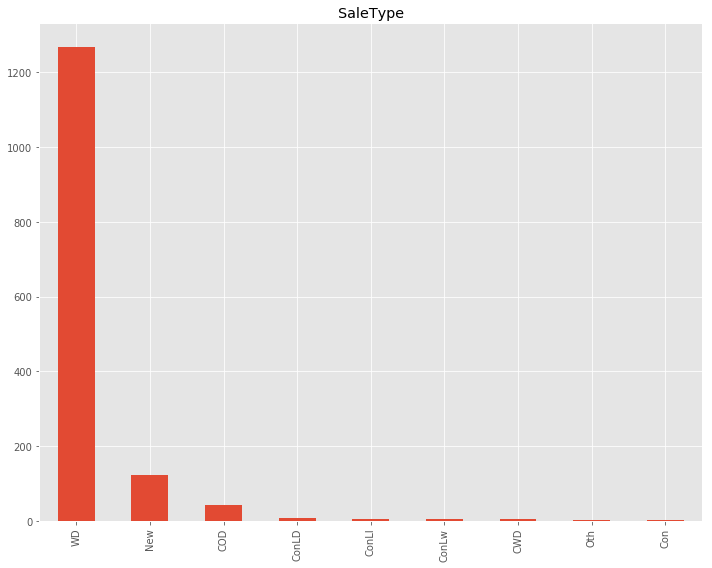

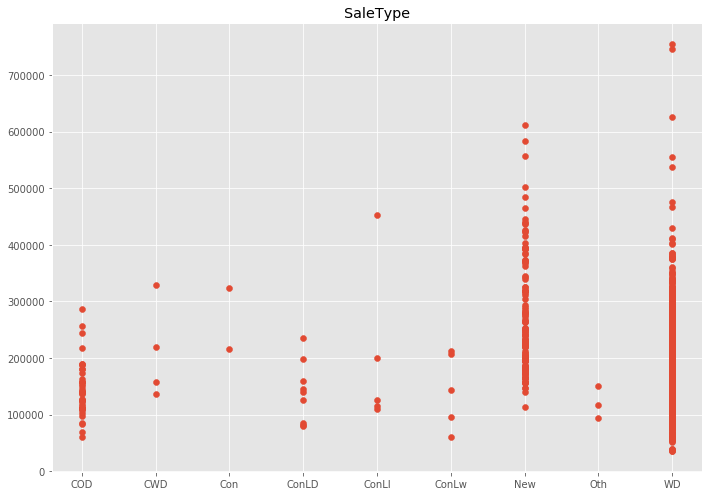

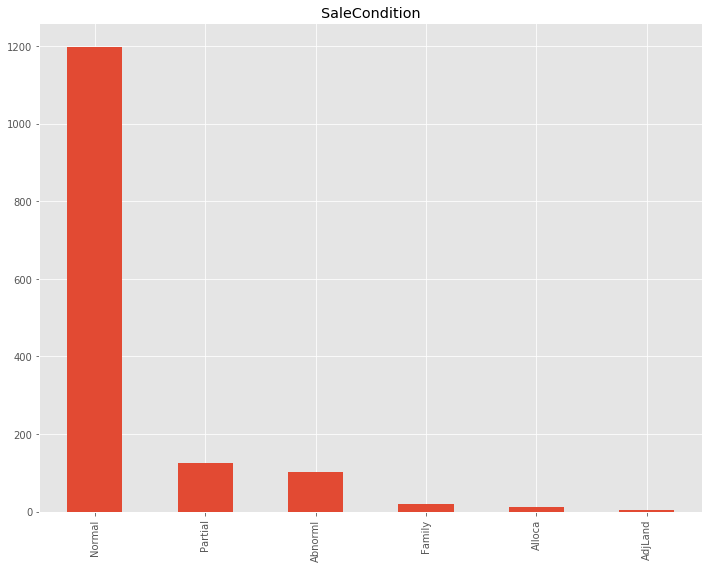

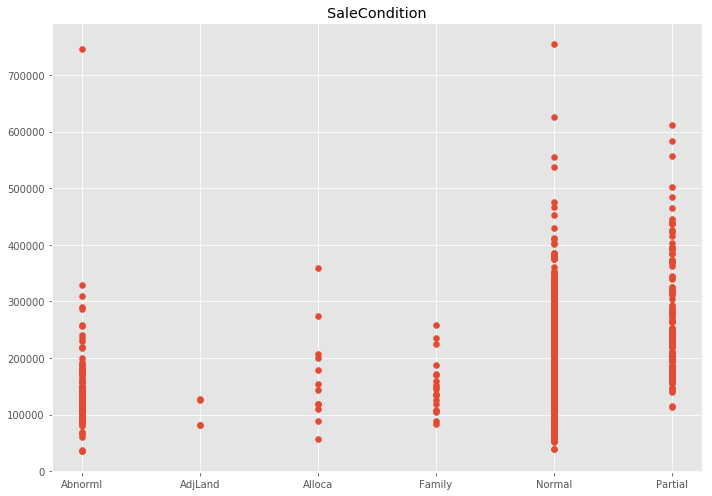

In [14]:
dff_uncontinuous=df.copy()
#dff_uncontinuous = dff_uncontinuous.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
types=dff_uncontinuous.dtypes
types2=types[types==object]
print(types2)
for i in types2.index:   
    df[i].value_counts().plot(kind='bar',figsize=(10,8))
    plt.title(i)
    plt.tight_layout()
    plt.style.use('ggplot')
    plt.show()
    plt.figure(figsize=(10,7))
    plt.scatter(df[i],df['SalePrice'])
    plt.title(i)
    plt.tight_layout()
    plt.style.use('ggplot')
    plt.show()

In [15]:
df_backup.info()
df=df_backup


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [16]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [17]:
from sklearn.neighbors import KNeighborsRegressor
LotFrontAge=df[['MSSubClass','LotArea','1stFlrSF','GrLivArea','LotFrontage']]
known_LotFrontage=LotFrontAge[LotFrontAge.LotFrontage.notnull()].as_matrix()
unknown_LotFrontage=LotFrontAge[LotFrontAge.LotFrontage.isnull()].as_matrix()
X_train=known_LotFrontage[:,0:-1]
y_train=known_LotFrontage[:,-1]

In [18]:
clf_lot=KNeighborsRegressor()
clf_lot.fit(X_train,y_train)
predict_unknown_LotFrontage=clf_lot.predict(unknown_LotFrontage[:,0:-1])
unknown_LotFrontage=[unknown_LotFrontage,predict_unknown_LotFrontage]
df.loc[(df.LotFrontage.isnull()),'LotFrontage']=predict_unknown_LotFrontage
#df.loc[行，列]

In [19]:
df.iloc[:,0:11]
#loc：通过选取行（列）标签索引数据 
#iloc：通过选取行（列）位置编号索引数据 
#ix：既可以通过行（列）标签索引数据，也可以通过行（列）位置编号索引数据

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig
0,1,60,RL,65.0,8450,Pave,No_access,Reg,Lvl,AllPub,Inside
1,2,20,RL,80.0,9600,Pave,No_access,Reg,Lvl,AllPub,FR2
2,3,60,RL,68.0,11250,Pave,No_access,IR1,Lvl,AllPub,Inside
3,4,70,RL,60.0,9550,Pave,No_access,IR1,Lvl,AllPub,Corner
4,5,60,RL,84.0,14260,Pave,No_access,IR1,Lvl,AllPub,FR2
5,6,50,RL,85.0,14115,Pave,No_access,IR1,Lvl,AllPub,Inside
6,7,20,RL,75.0,10084,Pave,No_access,Reg,Lvl,AllPub,Inside
7,8,60,RL,87.4,10382,Pave,No_access,IR1,Lvl,AllPub,Corner
8,9,50,RM,51.0,6120,Pave,No_access,Reg,Lvl,AllPub,Inside
9,10,190,RL,50.0,7420,Pave,No_access,Reg,Lvl,AllPub,Corner


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

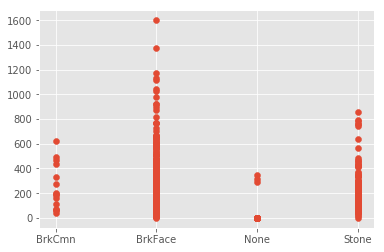

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [21]:
plt.scatter(df.MasVnrType,df.MasVnrArea)
plt.show()
df.MasVnrType.value_counts()

In [22]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder,LabelEncoder,StandardScaler
le=LabelEncoder()
types=df.dtypes
types2=types[types==object]
df.info()
types2.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
#for i in types2.index:
    #df[i]=le.fit_transform(df[i])

In [24]:
df.MasVnrType.fillna('No_data',inplace=True)
df.BsmtQual.fillna('No_data',inplace=True)
df.BsmtCond.fillna('No_data',inplace=True)
df.BsmtExposure.fillna('No_data',inplace=True)
df.BsmtFinType1.fillna('No_data',inplace=True)
df.BsmtFinType2.fillna('No_data',inplace=True)
df.GarageType.fillna('No_data',inplace=True)
df.GarageFinish.fillna('No_data',inplace=True)
df.GarageQual.fillna('No_data',inplace=True)
df.GarageCond.fillna('No_data',inplace=True)
df.Electrical.fillna('No_data',inplace=True)






In [25]:
#df.BsmtFinSF1.fillna(df.BsmtFinSF1.mean(),inplace=True)
#df.BsmtFinSF2.fillna(df.BsmtFinSF2.mean(),inplace=True)
#df.BsmtFullBath.fillna(df.BsmtFinSF2.median(),inplace=True)
#df.BsmtHalfBath.fillna(df.BsmtHalfBath.median(),inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)
df.GarageYrBlt.fillna(df.GarageYrBlt.median(),inplace=True)



In [26]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
No_data      8
Name: MasVnrType, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [28]:
for i in types2.index:
    df[i]=le.fit_transform(df[i])
#必须先搞缺失值，包括类型和值，否则不匹配

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Ext

In [30]:
Ohe=OneHotEncoder()

In [31]:
Ohe.fit_transform(df_backup.MSSubClass.reshape(-1,1))
bb=Ohe.transform(df_backup.MSSubClass.reshape(-1,1)).toarray()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [32]:
dummies_MSSubClass=pd.get_dummies(df_backup['MSSubClass'],prefix='MSSubClass')
dummies_MSZoning=pd.get_dummies(df_backup['MSZoning'],prefix='MSZoning')
dummies_Street=pd.get_dummies(df_backup['Street'],prefix='Street')
dummies_Alley=pd.get_dummies(df_backup['Alley'],prefix='Alley')
dummies_LotShape=pd.get_dummies(df_backup['LotShape'],prefix='MSSubClass')
dummies_LandContour=pd.get_dummies(df_backup['LandContour'],prefix='LandContour')
dummies_Utilities=pd.get_dummies(df_backup['Utilities'],prefix='Utilities')
dummies_LotConfig=pd.get_dummies(df_backup['LotConfig'],prefix='LotConfig')
dummies_LandSlope=pd.get_dummies(df_backup['LandSlope'],prefix='MSSubClass')
dummies_Neighborhood=pd.get_dummies(df_backup['Neighborhood'],prefix='Neighborhood')
dummies_Condition1=pd.get_dummies(df_backup['Condition1'],prefix='Condition1')
dummies_Condition2=pd.get_dummies(df_backup['Condition2'],prefix='Condition2')
dummies_BldgType=pd.get_dummies(df_backup['BldgType'],prefix='BldgType')

dummies_HouseStyle=pd.get_dummies(df_backup['HouseStyle'],prefix='HouseStyle')
dummies_OverallQual=pd.get_dummies(df_backup['OverallQual'],prefix='OverallQual')
dummies_OverallCond=pd.get_dummies(df_backup['OverallCond'],prefix='OverallCond')
dummies_RoofStyle=pd.get_dummies(df_backup['RoofStyle'],prefix='RoofStyle')
dummies_RoofMatl=pd.get_dummies(df_backup['RoofMatl'],prefix='RoofMatl')
dummies_Exterior1st=pd.get_dummies(df_backup['Exterior1st'],prefix='Exterior1st')
dummies_Exterior2nd=pd.get_dummies(df_backup['Exterior2nd'],prefix='Exterior2nd')
dummies_MasVnrType=pd.get_dummies(df_backup['MasVnrType'],prefix='MasVnrType')
dummies_ExterQual=pd.get_dummies(df_backup['ExterQual'],prefix='ExterQual')
dummies_ExterCond=pd.get_dummies(df_backup['ExterCond'],prefix='ExterCond')
dummies_Foundation=pd.get_dummies(df_backup['Foundation'],prefix='Foundation')
dummies_BsmtQual=pd.get_dummies(df_backup['BsmtQual'],prefix='BsmtQual')
dummies_BsmtCond=pd.get_dummies(df_backup['BsmtCond'],prefix='BsmtCond')
dummies_BsmtExposure=pd.get_dummies(df_backup['BsmtExposure'],prefix='BsmtExposure')
dummies_BsmtFinType1=pd.get_dummies(df_backup['BsmtFinType1'],prefix='BsmtFinType1')
dummies_BsmtFinType2=pd.get_dummies(df_backup['BsmtFinType2'],prefix='BsmtFinType2')
dummies_Heating=pd.get_dummies(df_backup['Heating'],prefix='Heating')
dummies_HeatingQC=pd.get_dummies(df_backup['HeatingQC'],prefix='HeatingQC')
dummies_Electrical=pd.get_dummies(df_backup['Electrical'],prefix='Electrical')
dummies_BsmtFullBath=pd.get_dummies(df_backup['BsmtFullBath'],prefix='BsmtFullBath')
dummies_BsmtHalfBath=pd.get_dummies(df_backup['BsmtHalfBath'],prefix='BsmtHalfBath')
dummies_FullBath=pd.get_dummies(df_backup['FullBath'],prefix='FullBath')
dummies_HalfBath=pd.get_dummies(df_backup['HalfBath'],prefix='HalfBath')
dummies_BedroomAbvGr=pd.get_dummies(df_backup['BedroomAbvGr'],prefix='BedroomAbvGr')
dummies_KitchenAbvGr=pd.get_dummies(df_backup['KitchenAbvGr'],prefix='KitchenAbvGr')
dummies_KitchenQual=pd.get_dummies(df_backup['KitchenQual'],prefix='KitchenQual')
dummies_TotRmsAbvGrd=pd.get_dummies(df_backup['TotRmsAbvGrd'],prefix='TotRmsAbvGrd')
dummies_Functional=pd.get_dummies(df_backup['Functional'],prefix='Functional')
dummies_Fireplaces=pd.get_dummies(df_backup['Fireplaces'],prefix='Fireplaces')
dummies_FireplaceQu=pd.get_dummies(df_backup['FireplaceQu'],prefix='FireplaceQu')

dummies_GarageType=pd.get_dummies(df_backup['GarageType'],prefix='GarageType')
dummies_GarageFinish=pd.get_dummies(df_backup['GarageFinish'],prefix='GarageFinish')
dummies_GarageCars=pd.get_dummies(df_backup['GarageCars'],prefix='GarageCars')
dummies_GarageQual=pd.get_dummies(df_backup['GarageQual'],prefix='GarageQual')
dummies_GarageCond=pd.get_dummies(df_backup['GarageCond'],prefix='GarageCond')
dummies_PavedDrive=pd.get_dummies(df_backup['PavedDrive'],prefix='PavedDrive')
dummies_PoolQC=pd.get_dummies(df_backup['PoolQC'],prefix='PoolQC')
dummies_Fence=pd.get_dummies(df_backup['Fence'],prefix='Fence')
dummies_MiscFeature=pd.get_dummies(df_backup['MiscFeature'],prefix='MiscFeature')
dummies_SaleType=pd.get_dummies(df_backup['SaleType'],prefix='SaleType')
dummies_SaleCondition=pd.get_dummies(df_backup['SaleCondition'],prefix='SaleCondition')



In [33]:
df_onehotencoder=pd.concat([df_backup,dummies_MSSubClass,
                            dummies_MSZoning,dummies_Street,dummies_Alley,dummies_LotShape,dummies_LandContour,dummies_Utilities,
                            dummies_LotConfig,dummies_LandSlope,dummies_Neighborhood,dummies_Condition1,dummies_Condition2,dummies_BldgType,
                            dummies_HouseStyle,dummies_OverallQual,dummies_OverallCond,dummies_RoofStyle,dummies_RoofMatl,dummies_Exterior1st,
                            dummies_Exterior2nd,dummies_MasVnrType,dummies_ExterQual,dummies_ExterCond,dummies_Foundation,dummies_BsmtQual,
                            dummies_BsmtCond,dummies_BsmtExposure,dummies_BsmtFinType1,dummies_BsmtFinType2,dummies_Heating,dummies_HeatingQC,
                            dummies_Electrical,dummies_BsmtFullBath,dummies_BsmtHalfBath,dummies_FullBath,dummies_HalfBath,dummies_BedroomAbvGr,
                            dummies_KitchenAbvGr,dummies_KitchenQual,dummies_TotRmsAbvGrd,dummies_Functional,dummies_Fireplaces,dummies_FireplaceQu
 ],axis=1)
df_onehotencoder.drop(['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
         'Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
         'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
         'Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
         'Functional','Fireplaces','FireplaceQu'
],inplace=True,axis=1)
df_onehotencoder

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,1,0,0,0,0,0,0,1,0,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,1,0,0,0,0,0,0,0,1
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,1,0,0,0,0,0,0,0,1
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,1,0,0,0,0,1,0,0,0
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,1,0,0,0,0,0,0,0,1
5,6,85.0,14115,1993,1995,0.0,732,0,64,796,...,1,0,0,0,0,0,0,1,0,0
6,7,75.0,10084,2004,2005,186.0,1369,0,317,1686,...,0,1,0,0,0,0,1,0,0,0
7,8,87.4,10382,1973,1973,240.0,859,32,216,1107,...,0,0,1,0,0,0,0,0,0,1
8,9,51.0,6120,1931,1950,0.0,0,0,952,952,...,0,0,1,0,0,0,0,0,0,1
9,10,50.0,7420,1939,1950,0.0,851,0,140,991,...,0,0,1,0,0,0,0,0,0,1


In [34]:
df_onehotencoder_copy=df_onehotencoder.copy()

In [35]:
from sklearn.preprocessing import StandardScaler,scale
df_onehotencoder['LotFrontage']=scale(df_onehotencoder['LotFrontage'])
df_onehotencoder['LotArea']=scale(df_onehotencoder['LotArea'])
df_onehotencoder['YearBuilt']=scale(df_onehotencoder['YearBuilt'])
df_onehotencoder['YearRemodAdd']=scale(df_onehotencoder['YearRemodAdd'])
#df_onehotencoder['MasVnrArea']=scale(df_onehotencoder['MasVnrArea'])
df_onehotencoder['BsmtFinSF1']=scale(df_onehotencoder['BsmtFinSF1'])
df_onehotencoder['BsmtFinSF2']=scale(df_onehotencoder['BsmtFinSF2'])
df_onehotencoder['BsmtUnfSF']=scale(df_onehotencoder['BsmtUnfSF'])
df_onehotencoder['TotalBsmtSF']=scale(df_onehotencoder['TotalBsmtSF'])
df_onehotencoder['1stFlrSF']=scale(df_onehotencoder['1stFlrSF'])
df_onehotencoder['2ndFlrSF']=scale(df_onehotencoder['2ndFlrSF'])
df_onehotencoder['LowQualFinSF']=scale(df_onehotencoder['LowQualFinSF'])
df_onehotencoder['GrLivArea']=scale(df_onehotencoder['GrLivArea'])
#df_onehotencoder['GarageYrBlt']=scale(df_onehotencoder['GarageYrBlt'])
df_onehotencoder['GarageArea']=scale(df_onehotencoder['GarageArea'])
df_onehotencoder['WoodDeckSF']=scale(df_onehotencoder['WoodDeckSF'])
df_onehotencoder['OpenPorchSF']=scale(df_onehotencoder['OpenPorchSF'])
df_onehotencoder['EnclosedPorch']=scale(df_onehotencoder['EnclosedPorch'])
df_onehotencoder['3SsnPorch']=scale(df_onehotencoder['3SsnPorch'])
df_onehotencoder['PoolArea']=scale(df_onehotencoder['PoolArea'])
df_onehotencoder['MoSold']=scale(df_onehotencoder['MoSold'])
df_onehotencoder['YrSold']=scale(df_onehotencoder['YrSold'])

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [36]:
print(df.GarageCars)

0       2
1       2
2       2
3       3
4       3
5       2
6       2
7       2
8       2
9       1
10      1
11      3
12      1
13      3
14      1
15      2
16      2
17      2
18      2
19      1
20      3
21      1
22      2
23      2
24      1
25      3
26      2
27      3
28      1
29      1
       ..
1430    2
1431    2
1432    1
1433    2
1434    2
1435    2
1436    2
1437    3
1438    2
1439    2
1440    2
1441    2
1442    3
1443    1
1444    2
1445    1
1446    1
1447    2
1448    1
1449    0
1450    0
1451    3
1452    2
1453    0
1454    2
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64


In [37]:
#填补缺失值
df_onehotencoder['MasVnrArea']= df_onehotencoder_copy.MasVnrArea.fillna(df_onehotencoder.MasVnrArea.median())
df_onehotencoder['GarageYrBlt']= df_onehotencoder_copy.GarageYrBlt.fillna(df_onehotencoder.GarageYrBlt.median())


df_onehotencoder['MasVnrArea']=scale(df_onehotencoder['MasVnrArea'])
df_onehotencoder['GarageYrBlt']=scale(df_onehotencoder['GarageYrBlt'])

In [38]:
df_onehotencoder.describe()
df_onehotencoder['SalePrice']=scale(df_onehotencoder['SalePrice'])

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [39]:
df_onehotencoder

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5
0,1,-0.255236,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,1,0,0,0,0,0,0,1,0,0
1,2,0.374770,-0.091886,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0,1,0,0,0,0,0,0,0,1
2,3,-0.129235,0.073480,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0,1,0,0,0,0,0,0,0,1
3,4,-0.465238,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0,1,0,0,0,0,1,0,0,0
4,5,0.542772,0.375148,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0,1,0,0,0,0,0,0,0,1
5,6,0.584772,0.360616,0.719786,0.491040,-0.570750,0.632450,-0.288653,-1.139286,-0.596115,...,1,0,0,0,0,0,0,1,0,0
6,7,0.164768,-0.043379,1.084115,0.975575,0.458754,2.029558,-0.288653,-0.566519,1.433276,...,0,1,0,0,0,0,1,0,0,0
7,8,0.685573,-0.013513,0.057371,-0.574938,0.757643,0.910994,-0.090220,-0.795173,0.113032,...,0,0,1,0,0,0,0,0,0,1
8,9,-0.843242,-0.440659,-1.333700,-1.689368,-0.570750,-0.973018,-0.288653,0.871057,-0.240402,...,0,0,1,0,0,0,0,0,0,1
9,10,-0.885242,-0.310370,-1.068734,-1.689368,-0.570750,0.893448,-0.288653,-0.967230,-0.151473,...,0,0,1,0,0,0,0,0,0,1


In [40]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
y=df_onehotencoder['SalePrice']
X=df_onehotencoder.drop(['SalePrice'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
y_train

1054    0.932803
119    -0.213198
364     0.114321
1450   -0.565649
25      0.949172
1221   -0.590833
1166    0.811290
1015    0.580226
1129   -0.515281
1143   -1.270803
1457    1.077611
846     0.403937
22      0.618002
801    -0.894301
1385   -0.697866
48     -0.855266
392    -0.937114
829    -0.422100
1008    0.743922
1109    1.247604
602     0.492082
63     -0.515281
46      0.739968
721    -0.477505
549     1.033539
835    -0.666385
595     1.738693
1265    0.037509
891    -0.106040
220     0.301942
          ...   
802     0.101729
1338    0.240241
844    -0.340252
1320   -0.307513
11      2.066086
412     0.517266
1304   -0.641201
658    -1.050442
1       0.007288
75     -1.132291
1013   -1.207843
1163   -0.906150
1427   -0.515281
149    -0.830082
915    -1.333763
1184    0.072767
770    -0.579500
843    -0.502689
229     0.145801
942    -0.389361
638    -1.207843
1268    2.519399
922    -0.137646
748     1.000800
153     0.680962
866     0.855991
742    -0.024192
74     -0.9257

In [42]:
clf_KNN=KNeighborsRegressor()
clf_KNN.fit(X_train,y_train)
predicts_knn=clf_KNN.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cross_val_score(clf_KNN,X,y,cv=5,scoring='r2')

print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_knn),mean_absolute_error(y_test,predicts_knn),mean_squared_error(y_test,predicts_knn)))


the r2_score is 0.231883375804 	mean_absolute_error is 0.637043797648 	 the mean_squared_error is 0.875386276375


In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cross_val_score(lr,X,y,cv=5)
lr.fit(X_train,y_train)
predicts_lr=lr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_lr),mean_absolute_error(y_test,predicts_lr),mean_squared_error(y_test,predicts_lr)))


the r2_score is -523207650843.0 	mean_absolute_error is 99058.1292524 	 the mean_squared_error is 596275074404.0


In [44]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
print(cross_val_score(dt,X,y,cv=5))
dt.fit(X_train,y_train)
predicts_dt=dt.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_dt),mean_absolute_error(y_test,predicts_dt),mean_squared_error(y_test,predicts_dt)))


[ 0.65011363  0.61373268  0.82179535  0.77658602  0.63844626]
the r2_score is 0.545896323481 	mean_absolute_error is 0.398899595255 	 the mean_squared_error is 0.517520535235


In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=150)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))


[ 0.87757163  0.7879763   0.86830975  0.88210329  0.85394507]
the r2_score is 0.7918144048 	mean_absolute_error is 0.26874276087 	 the mean_squared_error is 0.237259300524


[ 0.80134127  0.77688133  0.82004911  0.77769264  0.75275771]
the r2_score is 0.706749550194 	mean_absolute_error is 0.344979493007 	 the mean_squared_error is 0.334203701905


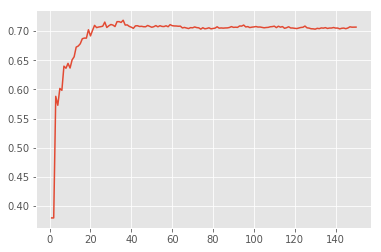

In [46]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=150)
print(cross_val_score(abr,X,y,cv=5))
abr.fit(X_train,y_train)
predicts_abr=abr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_abr),mean_absolute_error(y_test,predicts_abr),mean_squared_error(y_test,predicts_abr)))
plt.plot(range(1,151),[accuracy for accuracy in abr.staged_score(X_test,y_test)])
plt.show()

In [47]:
dt.feature_importances_

array([  8.27621897e-03,   1.06165786e-02,   6.70372731e-03,
         7.23189802e-02,   9.59840575e-03,   4.66116196e-03,
         4.64358008e-02,   9.31478856e-07,   1.07274050e-02,
         6.03825439e-02,   3.54871521e-03,   2.08603079e-02,
         1.54313377e-03,   1.35928490e-03,   4.44503041e-01,
         5.32287296e-05,   1.29855215e-03,   4.57933663e-04,
         2.90881553e-04,   1.83029308e-01,   1.65577416e-03,
         1.54727912e-03,   3.91128034e-05,   1.50044160e-03,
         4.77370033e-03,   2.34784409e-03,   0.00000000e+00,
         8.27981206e-08,   0.00000000e+00,   0.00000000e+00,
         8.75392867e-06,   8.27981206e-08,   8.27981205e-10,
         1.93501624e-03,   2.68857885e-03,   3.04023468e-04,
         5.16050314e-04,   7.45183085e-07,   3.18589819e-04,
         0.00000000e+00,   0.00000000e+00,   7.32412461e-06,
         4.69063979e-05,   0.00000000e+00,   0.00000000e+00,
         1.86295771e-05,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [49]:
tuple(np.array(range(1,150)))

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149)

In [50]:
pipeline=Pipeline([
    ('plf',RandomForestRegressor())
])

In [51]:
parameters={
    #'plf__n_estimators':tuple(np.array(range(1,50))),
    'plf__criterion':('mse','mae'),
    'plf__max_depth':(150,155,160),
    'plf__min_samples_split':(2,3),
    'plf__min_samples_leaf':(1,2,3), 
    #'plf__bootstrap':(True,False),
}

In [52]:
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,cv=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('plf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'plf__criterion': ('mse', 'mae'), 'plf__max_depth': (150, 155, 160), 'plf__min_samples_split': (2, 3), 'plf__min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [53]:
print('Best score: %0.3f' %grid_search.best_score_)
print('Best parameter set:')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s:%r'%(param_name ,best_parameters[param_name]))

Best score: 0.854
Best parameter set:
	plf__criterion:'mse'
	plf__max_depth:155
	plf__min_samples_leaf:1
	plf__min_samples_split:2


In [54]:
predict_grid=grid_search.predict(X_test)

In [55]:
coeff=pd.DataFrame({"columns":list(X_train.columns),"coef":list(rfr.feature_importances_.T)})
coeff.sort_values('coef', inplace=True)
coeff

,coef,columns
71,0.000000e+00,Utilities_1
136,0.000000e+00,OverallQual_2
118,0.000000e+00,Condition2_4
160,0.000000e+00,RoofMatl_0
162,0.000000e+00,RoofMatl_2
169,0.000000e+00,Exterior1st_1
312,0.000000e+00,Functional_5
172,0.000000e+00,Exterior1st_4
175,0.000000e+00,Exterior1st_7
187,0.000000e+00,Exterior2nd_4


In [56]:
np.size(list(rfr.feature_importances_.T))

324

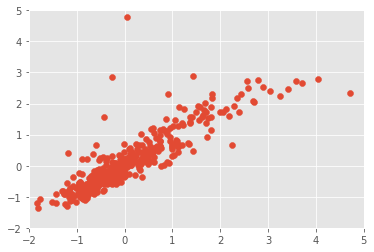

In [57]:
plt.scatter(y_test,predict_grid)
plt.axis([-2,5,-2,5])
plt.show()


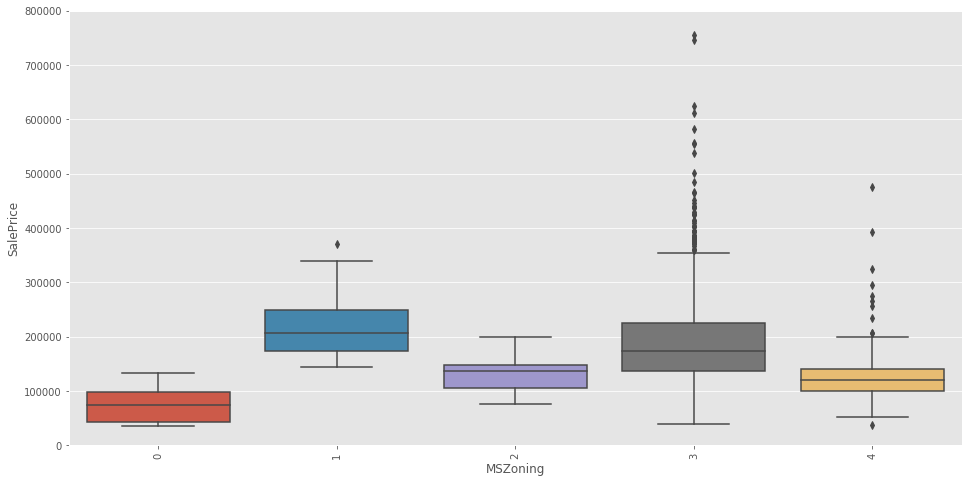

In [58]:
import seaborn as sns
var = 'MSZoning'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
plt.show()

In [59]:
train.MSZoning

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       4
9       3
10      3
11      3
12      3
13      3
14      3
15      4
16      3
17      3
18      3
19      3
20      3
21      4
22      3
23      4
24      3
25      3
26      3
27      3
28      3
29      4
       ..
1430    3
1431    3
1432    3
1433    3
1434    3
1435    3
1436    3
1437    3
1438    4
1439    3
1440    3
1441    4
1442    1
1443    3
1444    3
1445    3
1446    3
1447    3
1448    3
1449    4
1450    3
1451    3
1452    4
1453    3
1454    1
1455    3
1456    3
1457    3
1458    3
1459    3
Name: MSZoning, Length: 1460, dtype: int64

In [60]:
data


,SalePrice,MSZoning
0,208500,3
1,181500,3
2,223500,3
3,140000,3
4,250000,3
5,143000,3
6,307000,3
7,200000,3
8,129900,4
9,118000,3
